# Daily Average Forecasting Air Pollutant PM10 in Beijing

The originally hourly data is resample to daily average bringing down the observations from ~35K to 1500. This notebook includes all the station excluding the ones I decided to not forecast in the notebook `district_exploration`.

Also decided to change my target value from the `CO` to `PM10` since it is rare for CO that is outside to cause health impacts. Also any value of PM10 it bad for you so it is more important to forecast for stakeholder - United Nations Enviornment Programme.

In [1]:
#importing necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#data to read in 
df_chang = pd.read_csv('data/PRSA_Data_Changping_20130301-20170228.csv')
df_dong = pd.read_csv('data/PRSA_Data_Dongsi_20130301-20170228.csv')
df_guan = pd.read_csv('data/PRSA_Data_Guanyuan_20130301-20170228.csv')
df_guch = pd.read_csv('data/PRSA_Data_Gucheng_20130301-20170228.csv')
df_huai = pd.read_csv('data/PRSA_Data_Huairou_20130301-20170228.csv')
df_nong = pd.read_csv('data/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
df_shun = pd.read_csv('data/PRSA_Data_Shunyi_20130301-20170228.csv')
df_tian = pd.read_csv('data/PRSA_Data_Tiantan_20130301-20170228.csv')
df_wanl = pd.read_csv('data/PRSA_Data_Wanliu_20130301-20170228.csv')

In [3]:
#function to change year, month, day, and hour to datetime, set date as the index, and remove
#features: year, month, day, and hour

def set_datetime(df):
    df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
    df.set_index('date', inplace=True)
    df.drop(columns=['year', 'month', 'day', 'hour'], axis=1, inplace=True)
    return df

In [4]:
#set_datetime(df) on all stations
df_chang = set_datetime(df_chang)
df_dong = set_datetime(df_dong)
df_guan = set_datetime(df_guan)
df_guch = set_datetime(df_guch)
df_huai = set_datetime(df_huai)
df_nong = set_datetime(df_nong)
df_shun = set_datetime(df_shun)
df_tian = set_datetime(df_tian)
df_wanl = set_datetime(df_wanl)

#sanity check on station Changping
display(df_chang.head())

#info on df_chang
display(df_chang.info())

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
date,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
2013-03-01 01:00:00,2,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2013-03-01 02:00:00,3,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
2013-03-01 03:00:00,4,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
2013-03-01 04:00:00,5,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   PM2.5    34290 non-null  float64
 2   PM10     34482 non-null  float64
 3   SO2      34436 non-null  float64
 4   NO2      34397 non-null  float64
 5   CO       33543 non-null  float64
 6   O3       34460 non-null  float64
 7   TEMP     35011 non-null  float64
 8   PRES     35014 non-null  float64
 9   DEWP     35011 non-null  float64
 10  RAIN     35013 non-null  float64
 11  wd       34924 non-null  object 
 12  WSPM     35021 non-null  float64
 13  station  35064 non-null  object 
dtypes: float64(11), int64(1), object(2)
memory usage: 4.0+ MB


None

In [5]:
#value_counts() on wd - wind direction 
print('Changping Station:')
display(df_chang['wd'].value_counts())
display(df_chang['wd'].nunique())

Changping Station:


NNW    4776
NW     3838
N      3777
WNW    2877
ESE    2786
E      2427
NNE    1919
SSE    1853
SE     1823
NE     1721
S      1700
W      1412
ENE    1305
SSW    1126
SW      880
WSW     704
Name: wd, dtype: int64

16

Each station has 16 unique `wd` (wind direction) values:
- N: north
- NW: north west
- NNW: north north west
- NE: north east
- NNE: north north east
---
- S: south 
- SW: south west
- SSW: south south west
- SE: south east
- SSE: south south east
---
- E: east
- ENE: east north east
- ESE: east south east
---
- W: west
- WNW: west north west
- WSW: west south west

In [6]:
#resampling to daily average 
df_chang_avg = df_chang.resample('D').mean()
df_dong_avg = df_dong.resample('D').mean()
df_guan_avg = df_guan.resample('D').mean()
df_guch_avg = df_guch.resample('D').mean()
df_huai_avg = df_huai.resample('D').mean()
df_nong_avg = df_nong.resample('D').mean()
df_shun_avg = df_shun.resample('D').mean()
df_tian_avg = df_tian.resample('D').mean()
df_wanl_avg = df_wanl.resample('D').mean()


#sanity check on station Changping
display(df_chang_avg.head())

#info on df_chang
display(df_chang_avg.info())

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,,,,,,,
2013-03-01,12.5,5.083333,18.958333,16.041667,15.333333,387.500000,77.791667,0.812500,1023.858333,-19.583333,0.0,2.133333
2013-03-02,36.5,33.333333,39.833333,41.695652,60.782609,969.565217,28.652174,-0.395833,1023.729167,-16.116667,0.0,0.929167
2013-03-03,60.5,57.541667,82.666667,37.875000,58.791667,1254.000000,31.333333,5.329167,1011.312500,-12.995833,0.0,1.362500
2013-03-04,84.5,20.791667,36.166667,22.375000,30.250000,583.333333,66.458333,9.237500,1014.404167,-13.466667,0.0,2.383333
2013-03-05,108.5,106.958333,125.166667,50.708333,75.291667,1641.333333,88.750000,6.462500,1007.795833,-9.000000,0.0,0.766667


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2013-03-01 to 2017-02-28
Freq: D
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      1461 non-null   float64
 1   PM2.5   1450 non-null   float64
 2   PM10    1454 non-null   float64
 3   SO2     1457 non-null   float64
 4   NO2     1457 non-null   float64
 5   CO      1449 non-null   float64
 6   O3      1457 non-null   float64
 7   TEMP    1461 non-null   float64
 8   PRES    1461 non-null   float64
 9   DEWP    1461 non-null   float64
 10  RAIN    1461 non-null   float64
 11  WSPM    1461 non-null   float64
dtypes: float64(12)
memory usage: 148.4 KB


None

Before resampling had 35,064 entries now with taking the daily average have gone down to 1,461 observations. This makes sense there was 24 entries per day, and now it has only one. Not very ideal since the more data the better but if it performs badly then will revert to the previous hourly data.

In [7]:
#checking nulls for each station
df_list=[df_chang_avg, df_dong_avg, df_guan_avg, df_guch_avg, df_huai_avg, df_nong_avg, 
         df_shun_avg, df_tian_avg, df_wanl_avg]

#total
print('Total null values:')
for df in df_list:
    print(df.isna().sum().sum())

print('\n')
#PM10
print('PM10 null values')   
for df in df_list:
    print(df['PM10'].isna().sum().sum())

Total null values:
42
161
61
41
71
19
95
34
86


PM10 null values
7
4
2
0
11
1
1
0
0


The total nulls for the station are all fairly low, the highest being 161 - Dongsi station located in the Dongsheng District (Beijing city center). 11% of the data is missing for Dongsi. The second highest is Shunyi station located in Shunyi District with 95 total missing values. 6.5% of the data is missing. 

The PM10 null values are also low, the highest being 11, in the Huairou station. 0.8% of the total data. The second highest is Changping station located with 7 missing. 0.5% of the total data. 

The several stations with no missing values of PM10.

In [8]:
#.describe() on all stations
print("Changping Station:")
display(df_chang_avg['PM10'].describe()) 

print("Dongsi Station:")
display(df_dong_avg['PM10'].describe())

print("Guanyan Station:")
display(df_guan_avg['PM10'].describe())

print("Gucheng Station:")
display(df_guch_avg['PM10'].describe())

print("Huairou Station:")
display(df_huai_avg['PM10'].describe())

print("Nongzhanguan Station:")
display(df_nong_avg['PM10'].describe())

print("Shunyi Station:")
display(df_shun_avg['PM10'].describe())

print("Tiantan Station:")
display(df_tian_avg['PM10'].describe())

print("Wanliu Station:")
display(df_wanl_avg['PM10'].describe())

Changping Station:


count    1454.000000
mean       94.707382
std        67.917777
min         5.625000
25%        43.343750
50%        79.312500
75%       124.520833
max       482.750000
Name: PM10, dtype: float64

Dongsi Station:


count    1457.000000
mean      110.351618
std        80.328873
min         4.833333
25%        51.500000
50%        90.750000
75%       142.583333
max       584.666667
Name: PM10, dtype: float64

Guanyan Station:


count    1459.000000
mean      109.115466
std        75.066997
min         7.291667
25%        53.604167
50%        93.500000
75%       141.812500
max       555.416667
Name: PM10, dtype: float64

Gucheng Station:


count    1461.000000
mean      119.080492
std        75.938479
min         6.333333
25%        61.708333
50%       106.708333
75%       154.083333
max       564.666667
Name: PM10, dtype: float64

Huairou Station:


count    1450.000000
mean       91.515915
std        66.163801
min         5.208333
25%        41.218750
50%        76.583333
75%       124.333333
max       506.708333
Name: PM10, dtype: float64

Nongzhanguan Station:


count    1460.000000
mean      109.297843
std        78.455562
min         7.391304
25%        51.568182
50%        90.520833
75%       141.010417
max       520.217391
Name: PM10, dtype: float64

Shunyi Station:


count    1460.000000
mean       98.872346
std        70.702200
min         5.000000
25%        44.739583
50%        81.853261
75%       131.504167
max       515.333333
Name: PM10, dtype: float64

Tiantan Station:


count    1461.000000
mean      106.332842
std        73.340129
min         7.208333
25%        52.625000
50%        88.708333
75%       137.083333
max       537.125000
Name: PM10, dtype: float64

Wanliu Station:


count    1461.000000
mean      110.559175
std        75.717807
min         6.333333
25%        53.125000
50%        93.875000
75%       142.416667
max       514.375000
Name: PM10, dtype: float64

The Gucheng station has the highest PM10 (particulate matter) in mean and median. The Dongsi Station has the highest max value at 584.67. All of the max values for each station are quite high/far away from the 75th percentile; therefore, in the preprocessing step will use the median for the null values.

## Distribution of PM10

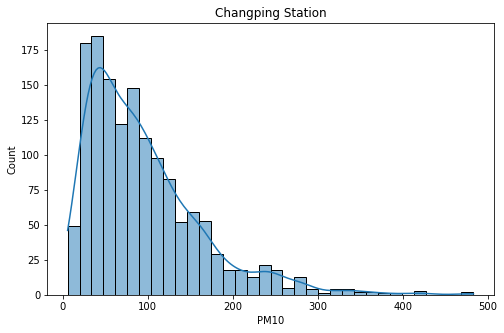

In [9]:
#histogram for Changping Station
plt.figure(figsize=(8,5))
sns.histplot(data=df_chang_avg, x='PM10', kde=True)
plt.title("Changping Station");

Changping has a right (positive) skewed distribution with bulk of PM10 being within 5 to 200 range; trailing off to 500.

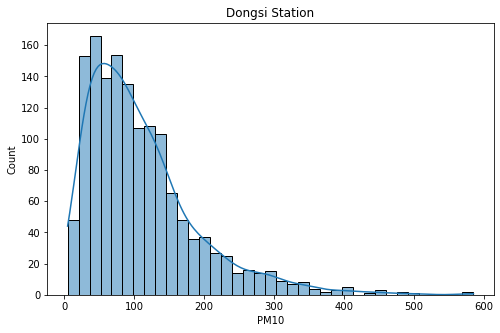

In [10]:
#histogram for Dongsi Station
plt.figure(figsize=(8,5))
sns.histplot(data=df_dong_avg, x='PM10', kde=True)
plt.title("Dongsi Station");

Dongsi has a right (positive) skewed distribution with bulk of PM10 being within 5 to 250 range; trailing off to 600.

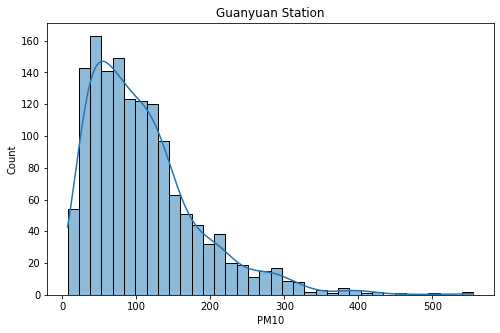

In [11]:
#histogram for Guanyuan Station
plt.figure(figsize=(8,5))
sns.histplot(data=df_guan_avg, x='PM10', kde=True)
plt.title("Guanyuan Station");

Guanyuan has a right (positive) skewed distribution with bulk of PM10 being within 5 to 250 range; trailing off to 500.

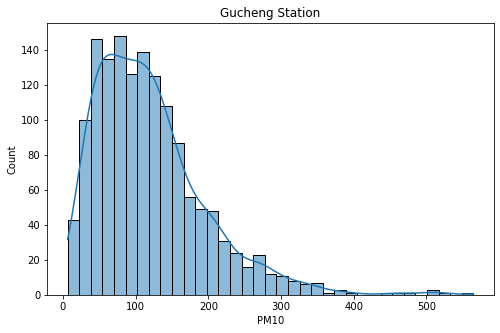

In [12]:
#histogram for Gucheng Station
plt.figure(figsize=(8,5))
sns.histplot(data=df_guch_avg, x='PM10', kde=True)
plt.title("Gucheng Station");

Gucheng has a right (positive) skewed distribution with bulk of PM10 being within 5 to 300 range; trailing off to 500.

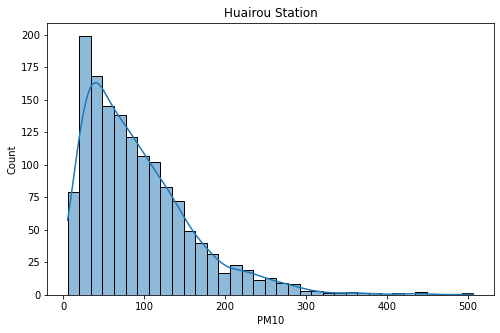

In [13]:
#histogram for Huairou Station
plt.figure(figsize=(8,5))
sns.histplot(data=df_huai_avg, x='PM10', kde=True)
plt.title("Huairou Station");

Huairou has a right (positive) skewed distribution with bulk of PM10 being within 5 to 200 range; trailing off to 500.

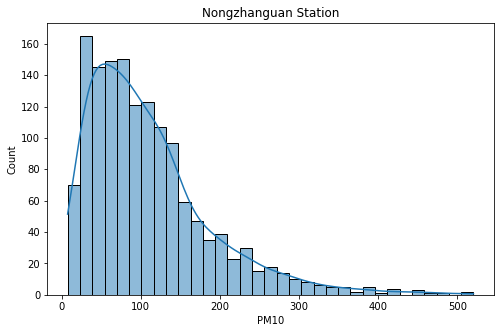

In [14]:
#histogram for Nongzhanguan Station
plt.figure(figsize=(8,5))
sns.histplot(data=df_nong_avg, x='PM10', kde=True)
plt.title("Nongzhanguan Station");

Nongzhanguan has a right (positive) skewed distribution with bulk of PM10 being within 5 to 300 range; trailing off to 500.

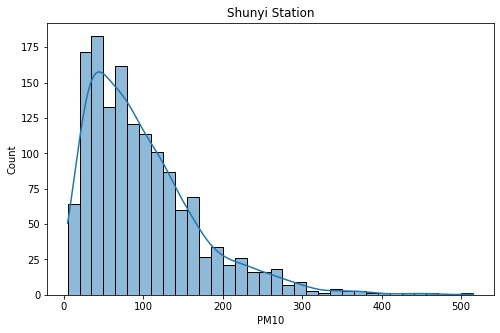

In [15]:
#histogram for Shunyi Station
plt.figure(figsize=(8,5))
sns.histplot(data=df_shun_avg, x='PM10', kde=True)
plt.title("Shunyi Station");

Shunyi has a right (positive) skewed distribution with bulk of PM10 being within 5 to 200 range; trailing off to 500.

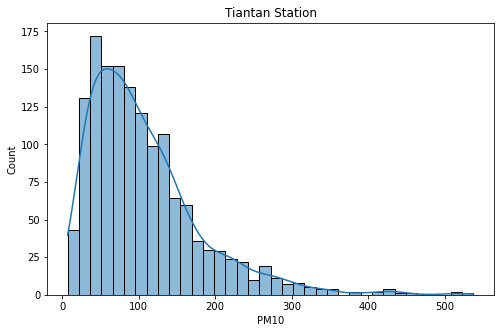

In [16]:
#histogram for Tiantan Station
plt.figure(figsize=(8,5))
sns.histplot(data=df_tian_avg, x='PM10', kde=True)
plt.title("Tiantan Station");

Tiantan has a right (positive) skewed distribution with bulk of PM10 being within 5 to 200 range; trailing off to 500.

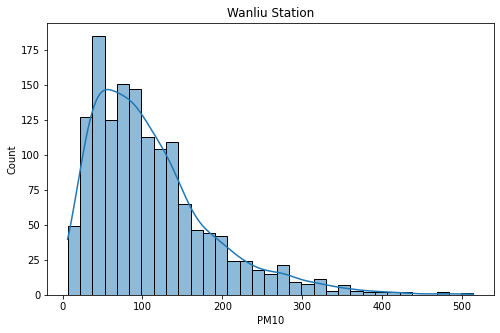

In [17]:
#histogram for Wanliu Station
plt.figure(figsize=(8,5))
sns.histplot(data=df_wanl_avg, x='PM10', kde=True)
plt.title("Wanliu Station");

Wanliu has a right (positive) skewed distribution with bulk of PM10 being within 5 to 300 range; trailing off to 500.

## Line Plots of PM10

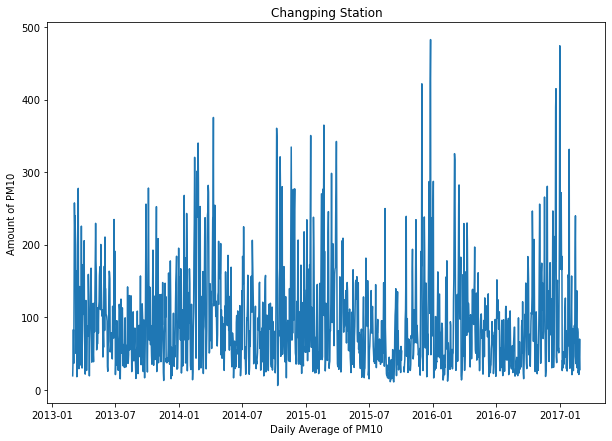

In [18]:
#lineplot for Changping Station
plt.figure(figsize=(10,7))
sns.lineplot(data=df_chang_avg, x='date', y='PM10')
plt.ylabel("Amount of PM10")
plt.xlabel('Daily Average of PM10')
plt.title("Changping Station");

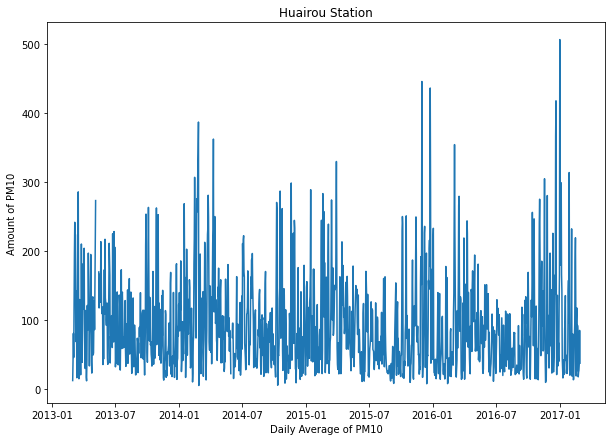

In [19]:
#lineplot for Huairou Station
plt.figure(figsize=(10,7))
sns.lineplot(data=df_huai_avg, x='date', y='PM10')
plt.ylabel("Amount of PM10")
plt.xlabel('Daily Average of PM10')
plt.title("Huairou Station");

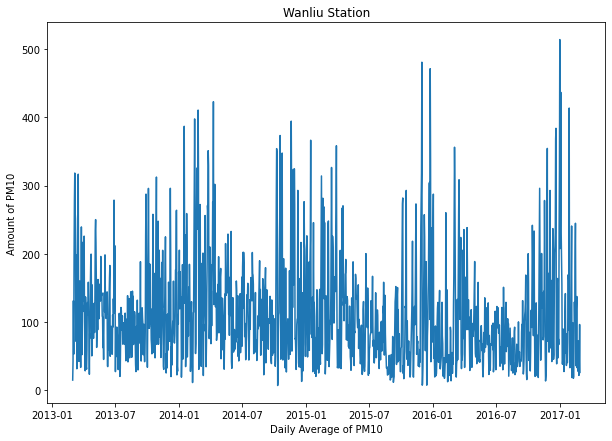

In [20]:
#lineplot for Wanliu Station
plt.figure(figsize=(10,7))
sns.lineplot(data=df_wanl_avg, x='date', y='PM10')
plt.ylabel("Amount of PM10")
plt.xlabel('Daily Average of PM10')
plt.title("Wanliu Station");

- There are no obvious patterns in the PM10 timer series plot for any station.
- There does not appear to be a general trend increasing or decreasing.
- There may be some seasonal variation where it seems to be some spikes at the beginning of some years like 2016 and 2017. 

## Changping Station

### Train/Test Split

In [21]:
#having the full df for reference
df_chang_avg.head()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,,,,,,,
2013-03-01,12.5,5.083333,18.958333,16.041667,15.333333,387.500000,77.791667,0.812500,1023.858333,-19.583333,0.0,2.133333
2013-03-02,36.5,33.333333,39.833333,41.695652,60.782609,969.565217,28.652174,-0.395833,1023.729167,-16.116667,0.0,0.929167
2013-03-03,60.5,57.541667,82.666667,37.875000,58.791667,1254.000000,31.333333,5.329167,1011.312500,-12.995833,0.0,1.362500
2013-03-04,84.5,20.791667,36.166667,22.375000,30.250000,583.333333,66.458333,9.237500,1014.404167,-13.466667,0.0,2.383333
2013-03-05,108.5,106.958333,125.166667,50.708333,75.291667,1641.333333,88.750000,6.462500,1007.795833,-9.000000,0.0,0.766667


In [22]:
# find the index which allows us to split off 20% of the data
cutoff = round(df_chang_avg.shape[0]*0.8)
cutoff

1169

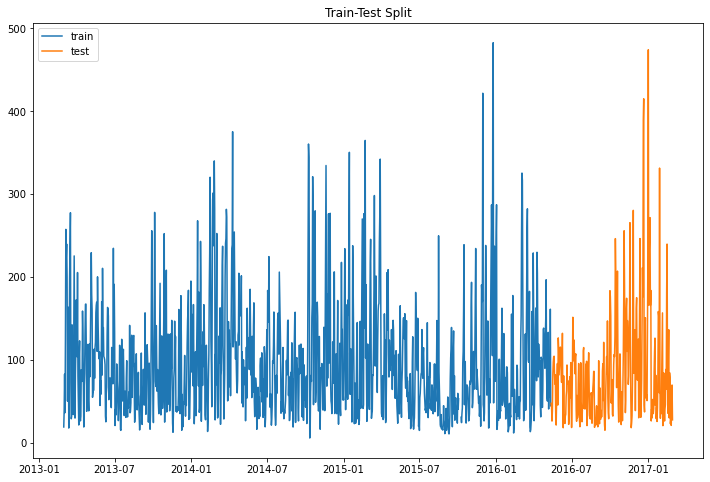

In [23]:
train_chang = df_chang_avg[:cutoff]

test_chang = df_chang_avg[cutoff:]

#plotting train test split
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_chang['PM10'], label='train')
ax.plot(test_chang['PM10'], label='test')
ax.set_title('Train-Test Split');
plt.legend();

In [24]:
#cross-validation
#from sklearn.model_selection import TimeSeriesSplit

#split = TimeSeriesSplit()

#for train_ind_c, val_ind_c in split.split(train_chang):
   #print(train_ind_c, val_ind_c)

In [25]:
#checking null values 
train_chang.isna().sum()

No        0
PM2.5    11
PM10      7
SO2       4
NO2       4
CO       12
O3        4
TEMP      0
PRES      0
DEWP      0
RAIN      0
WSPM      0
dtype: int64

In [26]:
#locating the missing values of target variable - PM10
train_chang.loc[train_chang['PM10'].isna()]

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,,,,,,,
2014-04-27,10140.5,NaN,NaN,NaN,NaN,NaN,NaN,18.754167,1011.141667,2.237500,0.0,2.012500
2014-04-28,10164.5,NaN,NaN,NaN,NaN,NaN,NaN,19.512500,1009.616667,3.858333,0.0,1.670833
2015-10-05,22764.5,NaN,NaN,8.291667,50.250000,1408.333333,98.750000,18.200000,1009.620833,12.912500,0.0,1.200000
2015-10-06,22788.5,NaN,NaN,5.833333,60.833333,1545.833333,98.833333,19.225000,1007.666667,13.983333,0.0,1.237500
2015-10-07,22812.5,NaN,NaN,5.166667,68.111111,1794.444444,66.666667,19.700000,1005.754167,11.841667,0.0,1.479167
2015-10-08,22836.5,NaN,NaN,NaN,NaN,NaN,NaN,15.041667,1010.525000,-4.995833,0.0,2.958333
2015-10-09,22860.5,NaN,NaN,NaN,NaN,NaN,NaN,14.745833,1002.533333,-4.208333,0.0,3.591667


In [27]:
#imputing the missing values with the median
train_chang = train_chang.fillna(train_chang.median())

In [28]:
train_chang.loc[train_chang['No'] == 10140.5]

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,,,,,,,
2014-04-27,10140.5,54.25,81.125,8.75,37.833333,850.0,53.416667,18.754167,1011.141667,2.2375,0.0,2.0125


This median value for PM10 is different than before because it takes the median of the train data not the full data like before.

### Checking for Stationarity

In [29]:
#dickey-fuller test
from statsmodels.tsa.stattools import adfuller

#autolag set to AIC to minimize it
chang_dft = adfuller(train_chang['PM10'], autolag='AIC')
output_chang = pd.Series(chang_dft[0:4], index=['test statistic', 'pvalue', 
                                               'number of lags used', 'number of observations'])
output_chang

test statistic           -9.395946e+00
pvalue                    6.374118e-16
number of lags used       7.000000e+00
number of observations    1.161000e+03
dtype: float64

The p-value for the aure quality is less than significance level of 0.05. The null hypothesis is rejected in favor of the alternative hypothesis which states that the dataset is stationary and its time series properties are constant over time.

### Baseline Model

In [30]:
#shifting by 7 for a week
base_chang = train_chang['PM10'].shift(7)

In [31]:
train_chang['PM10'].shape

(1169,)

In [32]:
base_chang.shape

(1169,)

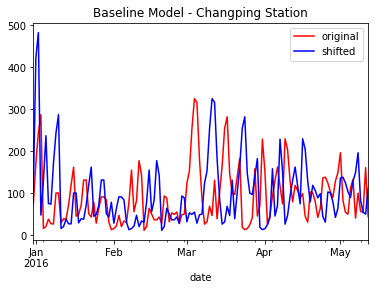

In [33]:
fig, ax = plt.subplots()

train_chang[1035:1169].PM10.plot(ax=ax, c='r', label='original')
base_chang[1035:1169].plot(ax=ax, c='b', label='shifted')
ax.set_title('Baseline Model - Changping Station')
ax.legend();

In [34]:
#calculate RMSE for the baseline model
from sklearn.metrics import mean_squared_error

#shifted by 7
np.sqrt(mean_squared_error(train_chang.PM10[7:], base_chang.dropna()))

94.54036253723302

### First Simple Model - Autoregressive Model (AR)

In [35]:
from statsmodels.tsa.arima.model import ARIMA

ar_chang = ARIMA(train_chang['PM10'], order=(1, 0, 0)).fit()
ar_chang.predict(typ='levels')

date
2013-03-01     97.045162
2013-03-02     54.868673
2013-03-03     66.143740
2013-03-04     89.279006
2013-03-05     64.163289
                 ...    
2016-05-08     66.593842
2016-05-09     98.776169
2016-05-10     75.393345
2016-05-11     74.178069
2016-05-12    131.656154
Freq: D, Name: predicted_mean, Length: 1169, dtype: float64

In [36]:
ar_chang.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -6388.116
Date:                Fri, 11 Nov 2022   AIC                          12782.233
Time:                        16:23:55   BIC                          12797.424
Sample:                    03-01-2013   HQIC                         12787.963
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.0452      4.648     20.880      0.000      87.936     106.155
ar.L1          0.5401      0.018     30.327      0.000       0.505       0.575
sigma2      3264.1350    100.782     32.388      0.000    3066.607    3461.663
===================================================================================
Ljung-Box (L1) (Q):                   5.44   Jarque-Bera (JB):               333.66
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                             0.61
Prob(H) (two-sided):                  0.66   Kurtosis:                         5.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
y_hat_ar_chang = ar_chang.predict(typ='levels')
np.sqrt(mean_squared_error(train_chang.PM10, y_hat_ar_chang))

57.1538033221575

This is an improved from the baseline model which had a RMSE of 94.54

In [38]:
#from statsmodels.tsa.ar_model import AutoReg

#ar_chang = AutoReg(train_chang['PM10'], lags=7).fit()


In [39]:
#ar_chang.summary()

### Moving Average Model (MA)

In [40]:
ma_chang1 = ARIMA(train_chang['PM10'], order=(0, 0, 1)).fit()
ma_chang1.predict(typ='levels')

date
2013-03-01     97.031678
2013-03-02     64.666020
2013-03-03     84.600874
2013-03-04     96.019876
2013-03-05     65.348536
                 ...    
2016-05-08     62.383536
2016-05-09    117.168738
2016-05-10     65.012303
2016-05-11     91.552115
2016-05-12    134.029939
Freq: D, Name: predicted_mean, Length: 1169, dtype: float64

In [41]:
ma_chang1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -6398.746
Date:                Fri, 11 Nov 2022   AIC                          12803.491
Time:                        16:24:03   BIC                          12818.683
Sample:                    03-01-2013   HQIC                         12809.221
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.0317      3.096     31.341      0.000      90.964     103.100
ma.L1          0.5318      0.019     28.084      0.000       0.495       0.569
sigma2      3324.8169    107.817     30.837      0.000    3113.499    3536.135
===================================================================================
Ljung-Box (L1) (Q):                  11.16   Jarque-Bera (JB):               455.10
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                             1.01
Prob(H) (two-sided):                  0.76   Kurtosis:                         5.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
y_hat_ma_chang1 = ma_chang1.predict(typ='levels')
np.sqrt(mean_squared_error(train_chang.PM10, y_hat_ma_chang1))

57.67317165842795

AIC Score and RMSE score performed worse the AR model.

In [43]:
# function for test data
def find_rmse_test(model, test_data=test_chang):
    y_hat = model.predict(start=test_data.PM10.index[0], end=test_data.PM10.index[-1])
    return np.sqrt(mean_squared_error(test_data.PM10, y_hat))

In [44]:
print(find_rmse_test(ar_chang))
print(find_rmse_test(ma_chang1))

67.20562628869678
67.27106650697658


### PACF & ACF Charts

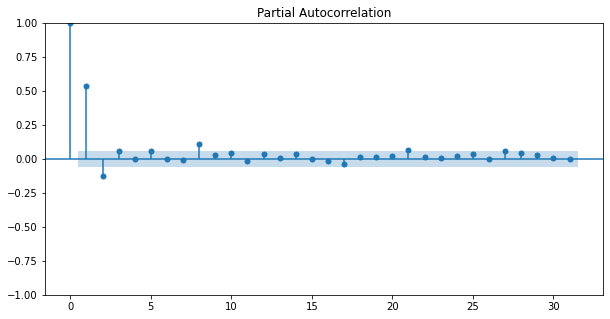

In [45]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(train_chang['PM10'], method='ywm', ax=ax);

From here can see that the values of p to try would be 1 and 2 and maybe 8. The others that are slighlty above the confidence interval like 21 and 27 are not worth it.

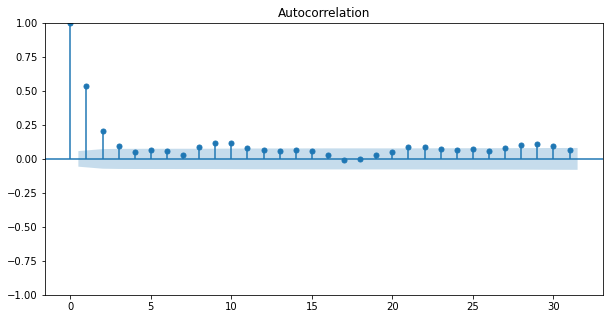

In [46]:
fig, ax = plt.subplots(figsize=(10,5))
plot_acf(train_chang['PM10'], ax=ax);

From here can see that the values of q to try would be 1, 2, and 3. Could also try 8, 9, 10, and 11 (if feeling adventurous). Others that are above the confidence interval (shaded part) are not worth it since there are so many before them that are within the shaded part.

### ARIMA Model - Tuning Based on ACF & PACF Charts

In [47]:
arima_chang1 = ARIMA(train_chang['PM10'], order=(1, 0, 1)).fit()
arima_chang1.predict(typ='levels')

date
2013-03-01     97.045058
2013-03-02     54.962541
2013-03-03     72.761893
2013-03-04     94.517297
2013-03-05     60.025147
                 ...    
2016-05-08     57.357663
2016-05-09    109.450470
2016-05-10     68.972896
2016-05-11     78.209062
2016-05-12    141.658193
Freq: D, Name: predicted_mean, Length: 1169, dtype: float64

In [48]:
arima_chang1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -6377.045
Date:                Fri, 11 Nov 2022   AIC                          12762.090
Time:                        16:24:09   BIC                          12782.346
Sample:                    03-01-2013   HQIC                         12769.730
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.0451      4.168     23.282      0.000      88.876     105.215
ar.L1          0.3564      0.037      9.586      0.000       0.284       0.429
ma.L1          0.2626      0.040      6.630      0.000       0.185       0.340
sigma2      3208.6608     98.800     32.476      0.000    3015.016    3402.306
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               381.05
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                             0.66
Prob(H) (two-sided):                  0.67   Kurtosis:                         5.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
def find_rmse(model, train_data=train_chang):
    y_hat = model.predict(typ='levels')
    return np.sqrt(mean_squared_error(train_data.PM10, y_hat))

In [50]:
find_rmse(arima_chang1)

56.61494631015671

This is the best performing model so far.

In [51]:
arima_chang2 = ARIMA(train_chang['PM10'], order=(8, 0, 9)).fit()
arima_chang2.predict(typ='levels')

/Users/juanatavera/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


date
2013-03-01     97.047877
2013-03-02     54.998064
2013-03-03     72.277850
2013-03-04     93.024495
2013-03-05     58.794134
                 ...    
2016-05-08     52.995516
2016-05-09    120.376084
2016-05-10     71.024863
2016-05-11     87.453384
2016-05-12    131.331132
Freq: D, Name: predicted_mean, Length: 1169, dtype: float64

In [52]:
arima_chang2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(8, 0, 9)   Log Likelihood               -6362.093
Date:                Fri, 11 Nov 2022   AIC                          12762.186
Time:                        16:24:43   BIC                          12858.400
Sample:                    03-01-2013   HQIC                         12798.476
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.0479      7.588     12.790      0.000      82.176     111.920
ar.L1          1.2759      2.144      0.595      0.552      -2.926       5.478
ar.L2         -0.7642      3.190     -0.240      0.811      -7.017       5.488
ar.L3          0.0643      1.811      0.035      0.972      -3.485       3.614
ar.L4          0.3769      0.449      0.839      0.401      -0.503       1.257
ar.L5         -0.2222      1.144     -0.194      0.846      -2.465       2.020
ar.L6          0.4333      0.765      0.566      0.571      -1.066       1.933
ar.L7         -0.3029      0.751     -0.403      0.687      -1.776       1.170
ar.L8          0.0948      0.602      0.158      0.875      -1.084       1.274
ma.L1         -0.6664      2.145     -0.311      0.756      -4.871       3.538
ma.L2          0.1883      1.966      0.096      0.924      -3.665       4.041
ma.L3          0.2282      0.354      0.645      0.519      -0.465       0.922
ma.L4         -0.3530      0.641     -0.550      0.582      -1.610       0.904
ma.L5          0.0502      1.026      0.049      0.961      -1.960       2.061
ma.L6         -0.3463      0.351     -0.985      0.324      -1.035       0.342
ma.L7         -0.0355      0.520     -0.068      0.946      -1.055       0.984
ma.L8          0.1368      0.331      0.414      0.679      -0.511       0.785
ma.L9         -0.0397      0.548     -0.072      0.942      -1.113       1.033
sigma2      3114.9185     99.006     31.462      0.000    2920.870    3308.967
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               443.14
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                             0.69
Prob(H) (two-sided):                  0.50   Kurtosis:                         5.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
find_rmse(arima_chang2)

55.89916302961963

This RMSE error improved but not by a lot.

In [54]:
#try more models later now moving on to other stations.

----

## Dongsi Station
### Train Test Split

In [55]:
pct_train_d = 0.80
cutoff_d = round(len(df_dong_avg) * pct_train_d)
train_dong, test_dong = df_dong_avg[:cutoff_d], df_dong_avg[cutoff_d:]

In [56]:
#checking nulls
train_dong.isna().sum()

No        0
PM2.5     2
PM10      1
SO2       1
NO2      41
CO       97
O3        1
TEMP      0
PRES      0
DEWP      0
RAIN      0
WSPM      0
dtype: int64

In [57]:
train_dong.loc[train_dong['PM10'].isna()]

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,,,,,,,
2013-08-11,3924.5,NaN,NaN,NaN,NaN,NaN,NaN,27.945833,1001.791667,26.175,0.6875,1.654167


In [58]:
#imputing the missing values with the median
train_dong = train_dong.fillna(train_dong.median())

In [59]:
#sanity check
train_dong.loc[train_dong['No'] == 3924.5]

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,,,,,,,
2013-08-11,3924.5,66.125,92.395833,13.069444,49.229167,1068.75,53.104167,27.945833,1001.791667,26.175,0.6875,1.654167


### Checking Stationarity

In [60]:
#autolag set to AIC to minimize it
dong_dft = adfuller(train_dong['PM10'], autolag='AIC')
output_dong = pd.Series(dong_dft[0:4], index=['test statistic', 'pvalue', 
                                               'number of lags used', 'number of observations'])
output_dong

test statistic           -1.607757e+01
pvalue                    5.422295e-29
number of lags used       2.000000e+00
number of observations    1.166000e+03
dtype: float64

The p-value is less than 0.05 therefore we can proceed to modeling since the series is already stationary.

### Baseline Model

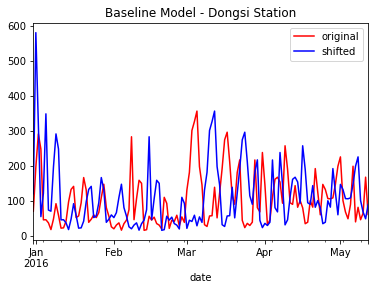

In [61]:
#baseline
base_dong = train_dong['PM10'].shift(7)

fig, ax = plt.subplots()

train_dong[1035:1169].PM10.plot(ax=ax, c='r', label='original')
base_dong[1035:1169].plot(ax=ax, c='b', label='shifted')
ax.set_title('Baseline Model - Dongsi Station')
ax.legend();

In [62]:
#RMSE for baseline model
np.sqrt(mean_squared_error(train_dong.PM10[7:], base_dong.dropna()))

109.06419378676655

### First Simple Model - AR

In [63]:
ar_dong = ARIMA(train_dong['PM10'], order=(1, 0, 0)).fit()
ar_dong.predict(typ='levels')

date
2013-03-01    110.765369
2013-03-02     57.841280
2013-03-03     73.949959
2013-03-04    121.685854
2013-03-05     74.102959
                 ...    
2016-05-08     73.665817
2016-05-09     95.479198
2016-05-10     76.886758
2016-05-11     86.714502
2016-05-12    140.570384
Freq: D, Name: predicted_mean, Length: 1169, dtype: float64

In [64]:
ar_dong.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -6555.049
Date:                Fri, 11 Nov 2022   AIC                          13116.098
Time:                        16:25:04   BIC                          13131.290
Sample:                    03-01-2013   HQIC                         13121.828
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        110.7654      5.164     21.451      0.000     100.645     120.886
ar.L1          0.5246      0.020     26.705      0.000       0.486       0.563
sigma2      4341.8145    124.011     35.012      0.000    4098.758    4584.871
===================================================================================
Ljung-Box (L1) (Q):                   6.40   Jarque-Bera (JB):               662.67
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                             0.86
Prob(H) (two-sided):                  0.15   Kurtosis:                         6.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
print(f"Train set RMSE: {find_rmse(ar_dong)}")
print(f"Test set RMSE: {find_rmse_test(ar_dong)}")

Train set RMSE: 58.364127745285664
Test set RMSE: 70.9311822897913


The test performed really 12 points worse than the train can see hear that the model does not predict very well.

### MA Model

In [66]:
ma_dong = ARIMA(train_dong['PM10'], order=(0, 0, 1)).fit()
ma_dong.predict(typ='levels')

date
2013-03-01    110.752718
2013-03-02     69.530699
2013-03-03     96.552718
2013-03-04    128.656219
2013-03-05     65.413496
                 ...    
2016-05-08     51.327880
2016-05-09    126.461328
2016-05-10     69.128977
2016-05-11    108.568697
2016-05-12    141.350936
Freq: D, Name: predicted_mean, Length: 1169, dtype: float64

In [67]:
ma_dong.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -6561.322
Date:                Fri, 11 Nov 2022   AIC                          13128.644
Time:                        16:25:13   BIC                          13143.836
Sample:                    03-01-2013   HQIC                         13134.374
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        110.7527      3.585     30.894      0.000     103.726     117.779
ma.L1          0.5185      0.023     22.930      0.000       0.474       0.563
sigma2      4391.2357    127.987     34.310      0.000    4140.386    4642.085
===================================================================================
Ljung-Box (L1) (Q):                  10.05   Jarque-Bera (JB):               893.66
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                             1.21
Prob(H) (two-sided):                  0.09   Kurtosis:                         6.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
print(f"Train set RMSE: {find_rmse(ma_dong)}")
print(f"Test set RMSE: {find_rmse_test(ma_dong)}")

Train set RMSE: 58.628470815962906
Test set RMSE: 70.98960399438515


This model performed worst than the simple AR model.

### PACF & ACF Charts

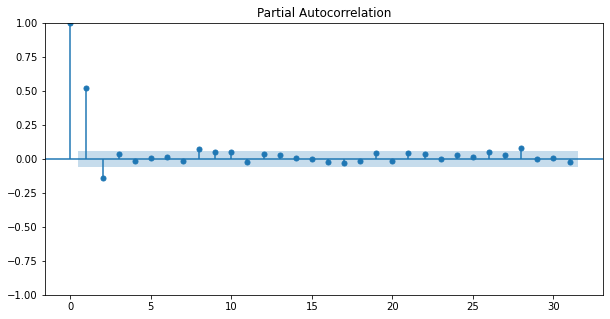

In [69]:
fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(train_dong['PM10'], method='ywm',  ax=ax);

Can try the p value being equal to 1, 2, or 8. All other values are within the shaded region of the confidence interval.

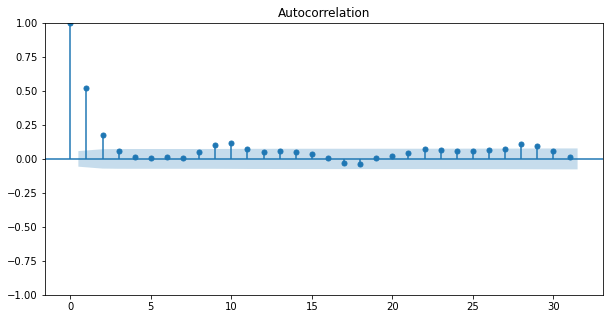

In [70]:
fig, ax = plt.subplots(figsize=(10,5))
plot_acf(train_dong['PM10'], ax=ax);

Can try the following values for q: 1, 2, 3, 9, or 10. 

### ARIMA Model

In [71]:
arima_dong1 = ARIMA(train_dong['PM10'], order=(1, 0, 1)).fit()
arima_dong1.predict(typ='levels')

date
2013-03-01    110.765290
2013-03-02     57.837647
2013-03-03     83.013521
2013-03-04    130.984802
2013-03-05     62.924559
                 ...    
2016-05-08     53.002799
2016-05-09    109.065507
2016-05-10     72.173842
2016-05-11     93.675147
2016-05-12    149.840311
Freq: D, Name: predicted_mean, Length: 1169, dtype: float64

In [72]:
arima_dong1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -6542.275
Date:                Fri, 11 Nov 2022   AIC                          13092.550
Time:                        16:26:18   BIC                          13112.806
Sample:                    03-01-2013   HQIC                         13100.190
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        110.7653      4.620     23.975      0.000     101.710     119.820
ar.L1          0.3291      0.041      8.109      0.000       0.250       0.409
ma.L1          0.2757      0.045      6.183      0.000       0.188       0.363
sigma2      4250.3206    118.702     35.807      0.000    4017.668    4482.973
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               832.98
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.17   Skew:                             0.96
Prob(H) (two-sided):                  0.13   Kurtosis:                         6.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
print(f"Train set RMSE: {find_rmse(arima_dong1)}")
print(f"Test set RMSE: {find_rmse_test(arima_dong1)}")

Train set RMSE: 57.8645432558707
Test set RMSE: 70.93186414980973


In [74]:
arima_dong2 = ARIMA(train_dong['PM10'], order=(2, 0, 2)).fit()
arima_dong2.predict(typ='levels')

/Users/juanatavera/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/juanatavera/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


date
2013-03-01    110.765312
2013-03-02     57.840335
2013-03-03     83.033340
2013-03-04    131.026116
2013-03-05     62.929243
                 ...    
2016-05-08     52.990787
2016-05-09    109.021929
2016-05-10     72.233739
2016-05-11     93.655270
2016-05-12    149.882645
Freq: D, Name: predicted_mean, Length: 1169, dtype: float64

In [75]:
arima_dong2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -6542.281
Date:                Fri, 11 Nov 2022   AIC                          13096.561
Time:                        16:26:20   BIC                          13126.944
Sample:                    03-01-2013   HQIC                         13108.021
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        110.7653      4.600     24.077      0.000     101.749     119.782
ar.L1          0.2728     45.193      0.006      0.995     -88.303      88.849
ar.L2          0.0177     14.875      0.001      0.999     -29.137      29.172
ma.L1          0.3321     45.190      0.007      0.994     -88.239      88.903
ma.L2          0.0164     12.457      0.001      0.999     -24.398      24.431
sigma2      4231.8500    125.514     33.716      0.000    3985.848    4477.852
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               833.83
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.17   Skew:                             0.96
Prob(H) (two-sided):                  0.13   Kurtosis:                         6.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [76]:
print(f"Train set RMSE: {find_rmse(arima_dong2)}")
print(f"Test set RMSE: {find_rmse_test(arima_dong2)}")

Train set RMSE: 57.865219005994206
Test set RMSE: 70.9319396951515


Performed worse than arima_dong1 by a couple value; very insignifcant. Overall still not a very good model.

In [77]:
arima_dong3 = ARIMA(train_dong['PM10'], order=(2, 0, 3)).fit()
arima_dong3.predict(typ='levels')

date
2013-03-01    110.709843
2013-03-02     57.785321
2013-03-03     82.668236
2013-03-04    129.651017
2013-03-05     60.361063
                 ...    
2016-05-08     53.789100
2016-05-09    110.466003
2016-05-10     74.730947
2016-05-11     94.104689
2016-05-12    150.384405
Freq: D, Name: predicted_mean, Length: 1169, dtype: float64

In [78]:
arima_dong3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -6539.730
Date:                Fri, 11 Nov 2022   AIC                          13093.461
Time:                        16:26:24   BIC                          13128.908
Sample:                    03-01-2013   HQIC                         13106.831
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        110.7098      6.871     16.114      0.000      97.244     124.176
ar.L1          1.1497      0.197      5.832      0.000       0.763       1.536
ar.L2         -0.1743      0.179     -0.974      0.330      -0.525       0.176
ma.L1         -0.5496      0.198     -2.782      0.005      -0.937      -0.162
ma.L2         -0.3254      0.075     -4.335      0.000      -0.472      -0.178
ma.L3         -0.0544      0.091     -0.600      0.549      -0.232       0.123
sigma2      4231.6625    124.170     34.080      0.000    3988.293    4475.032
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               802.56
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                             0.94
Prob(H) (two-sided):                  0.14   Kurtosis:                         6.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [79]:
print(f"Train set RMSE: {find_rmse(arima_dong3)}")
print(f"Test set RMSE: {find_rmse_test(arima_dong3)}")

Train set RMSE: 57.53457417893204
Test set RMSE: 70.82442058852797


Performed slightly better but still not very good.

-----

## Guayan Station
### Train Test Split

In [80]:
pct_train_gu = 0.80
cutoff_gu = round(len(df_guan_avg) * pct_train_gu)
train_guan, test_guan = df_guan_avg[:cutoff_gu], df_guan_avg[cutoff_gu:]

In [81]:
#checking for nulls
train_guan.isna().sum()

No        0
PM2.5     4
PM10      2
SO2       4
NO2       5
CO       35
O3        7
TEMP      0
PRES      0
DEWP      0
RAIN      0
WSPM      0
dtype: int64

In [82]:
train_guan.loc[train_guan['PM10'].isna()]

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,,,,,,,
2013-05-12,1740.5,NaN,NaN,15.9341,NaN,NaN,6.1761,22.233333,994.491667,1.537500,0.0,1.383333
2013-07-25,3516.5,NaN,NaN,NaN,NaN,NaN,NaN,29.679167,996.025000,19.829167,0.0,1.329167


In [83]:
#imputing null values with median 
train_guan = train_guan.fillna(train_guan.median())

In [84]:
#sanity check
train_guan.loc[train_guan['No'] == 1740.5]

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,,,,,,,
2013-05-12,1740.5,64.0,94.833333,15.9341,51.916667,1014.792572,6.1761,22.233333,994.491667,1.5375,0.0,1.383333


### Checking Stationarity

In [85]:
#autolag set to AIC to minimize it
guan_dft = adfuller(train_guan['PM10'], autolag='AIC')
output_guan = pd.Series(guan_dft[0:4], index=['test statistic', 'pvalue', 
                                               'number of lags used', 'number of observations'])
output_guan

test statistic             -19.202079
pvalue                       0.000000
number of lags used          1.000000
number of observations    1167.000000
dtype: float64

The p-value is under the 0.05 threshold; therefore series is stationary and can proceed with modeling.

### Baseline Model

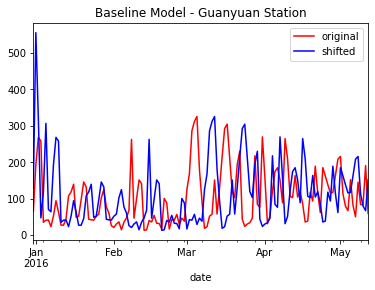

In [86]:
#baseline
base_guan = train_guan['PM10'].shift(7)

fig, ax = plt.subplots()

train_guan[1035:1169].PM10.plot(ax=ax, c='r', label='original')
base_guan[1035:1169].plot(ax=ax, c='b', label='shifted')
ax.set_title('Baseline Model - Guanyuan Station')
ax.legend();

In [87]:
#RMSE for the Baseline Model
np.sqrt(mean_squared_error(train_guan.PM10[7:], base_guan.dropna()))

102.51163966216238

### First Simple Model - AR

In [88]:
ar_guan = ARIMA(train_guan['PM10'], order=(1, 0, 0)).fit()
ar_guan.predict(typ='levels')

date
2013-03-01    109.569901
2013-03-02     58.495776
2013-03-03     70.603091
2013-03-04    114.532865
2013-03-05     74.298322
                 ...    
2016-05-08     78.428286
2016-05-09    128.009589
2016-05-10     95.969764
2016-05-11     95.861081
2016-05-12    151.811224
Freq: D, Name: predicted_mean, Length: 1169, dtype: float64

In [89]:
ar_guan.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -6486.890
Date:                Fri, 11 Nov 2022   AIC                          12979.781
Time:                        16:26:38   BIC                          12994.973
Sample:                    03-01-2013   HQIC                         12985.511
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        109.5699      4.740     23.114      0.000     100.279     118.861
ar.L1          0.5217      0.019     27.039      0.000       0.484       0.559
sigma2      3863.6387    110.540     34.952      0.000    3646.985    4080.293
===================================================================================
Ljung-Box (L1) (Q):                   6.02   Jarque-Bera (JB):               533.46
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.11   Skew:                             0.71
Prob(H) (two-sided):                  0.30   Kurtosis:                         5.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [90]:
print(f"Train set RMSE: {find_rmse(ar_guan)}")
print(f"Test set RMSE: {find_rmse_test(ar_guan)}")

Train set RMSE: 58.59187104645345
Test set RMSE: 70.50836597970753


### MA Model

In [91]:
ma_guan = ARIMA(train_guan['PM10'], order=(0, 0, 1)).fit()
ma_guan.predict(typ='levels')

date
2013-03-01    109.556495
2013-03-02     69.934684
2013-03-03     92.585388
2013-03-04    122.895229
2013-03-05     68.413656
                 ...    
2016-05-08     94.464919
2016-05-09    135.290074
2016-05-10     83.140284
2016-05-11    109.633710
2016-05-12    150.824666
Freq: D, Name: predicted_mean, Length: 1169, dtype: float64

In [92]:
ma_guan.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -6495.039
Date:                Fri, 11 Nov 2022   AIC                          12996.079
Time:                        16:26:40   BIC                          13011.271
Sample:                    03-01-2013   HQIC                         13001.809
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        109.5565      3.300     33.198      0.000     103.089     116.024
ma.L1          0.5101      0.023     22.556      0.000       0.466       0.554
sigma2      3920.4923    113.913     34.417      0.000    3697.227    4143.758
===================================================================================
Ljung-Box (L1) (Q):                  10.12   Jarque-Bera (JB):               786.60
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.14   Skew:                             1.10
Prob(H) (two-sided):                  0.20   Kurtosis:                         6.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [93]:
print(f"Train set RMSE: {find_rmse(ma_guan)}")
print(f"Test set RMSE: {find_rmse_test(ma_guan)}")

Train set RMSE: 58.99090290445292
Test set RMSE: 70.56267088602891


Performed worst than the previous model - simple AR.

### PACF & ACF Charts

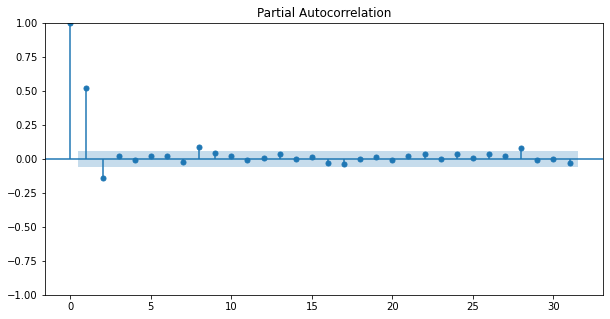

In [94]:
fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(train_guan['PM10'], method='ywm', ax=ax);

Potential p-values: 1, 2, or 8.

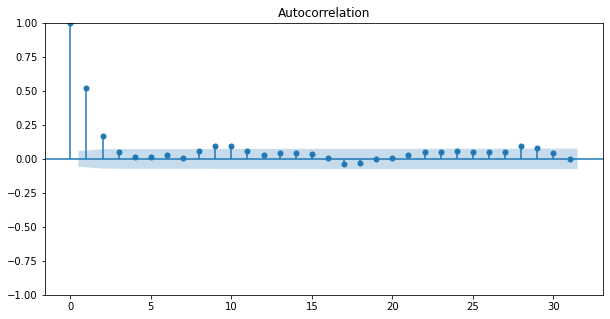

In [95]:
fig, ax = plt.subplots(figsize=(10,5))
plot_acf(train_guan['PM10'], ax=ax);

Potential q-values 1 or 2.

### ARIMA Model

In [96]:
arima_guan1 = ARIMA(train_guan['PM10'], order=(1, 0, 1)).fit()
arima_guan1.predict(typ='levels')

date
2013-03-01    109.570149
2013-03-02     58.439860
2013-03-03     78.396665
2013-03-04    123.328532
2013-03-05     65.657371
                 ...    
2016-05-08     80.398858
2016-05-09    138.235892
2016-05-10     86.570576
2016-05-11     99.863657
2016-05-12    160.403739
Freq: D, Name: predicted_mean, Length: 1169, dtype: float64

In [97]:
arima_guan1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -6475.310
Date:                Fri, 11 Nov 2022   AIC                          12958.620
Time:                        16:26:56   BIC                          12978.876
Sample:                    03-01-2013   HQIC                         12966.260
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        109.5701      4.271     25.655      0.000     101.199     117.941
ar.L1          0.3370      0.040      8.510      0.000       0.259       0.415
ma.L1          0.2597      0.045      5.798      0.000       0.172       0.347
sigma2      3790.1566    106.173     35.698      0.000    3582.061    3998.253
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               689.26
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                             0.81
Prob(H) (two-sided):                  0.28   Kurtosis:                         6.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [98]:
print(f"Train set RMSE: {find_rmse(arima_guan1)}")
print(f"Test set RMSE: {find_rmse_test(arima_guan1)}")

Train set RMSE: 58.09060236048952
Test set RMSE: 70.5020368668768


Performed slightly better than the previous models - AR and MA.

In [99]:
arima_guan2 = ARIMA(train_guan['PM10'], order=(1, 0, 3)).fit()
arima_guan2.predict(typ='levels')

date
2013-03-01    109.549415
2013-03-02     58.468905
2013-03-03     78.705652
2013-03-04    124.202196
2013-03-05     66.196599
                 ...    
2016-05-08     79.771597
2016-05-09    138.548422
2016-05-10     87.199813
2016-05-11     99.286192
2016-05-12    160.748680
Freq: D, Name: predicted_mean, Length: 1169, dtype: float64

In [100]:
arima_guan2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(1, 0, 3)   Log Likelihood               -6475.236
Date:                Fri, 11 Nov 2022   AIC                          12962.472
Time:                        16:26:58   BIC                          12992.856
Sample:                    03-01-2013   HQIC                         12973.932
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        109.5494      4.226     25.923      0.000     101.267     117.832
ar.L1          0.2201      0.424      0.519      0.604      -0.610       1.051
ma.L1          0.3774      0.427      0.885      0.376      -0.459       1.214
ma.L2          0.0716      0.257      0.279      0.780      -0.431       0.575
ma.L3          0.0143      0.081      0.176      0.860      -0.145       0.173
sigma2      3795.6135    110.916     34.221      0.000    3578.223    4013.004
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               705.51
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                             0.82
Prob(H) (two-sided):                  0.26   Kurtosis:                         6.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [101]:
print(f"Train set RMSE: {find_rmse(arima_guan2)}")
print(f"Test set RMSE: {find_rmse_test(arima_guan2)}")

Train set RMSE: 58.09856561479543
Test set RMSE: 70.49587948002593


Performed slightly worse than the previous model.

-----

## Gucheng Station
### Train Test Split

In [102]:
pct_train_guc = 0.80
cutoff_guc = round(len(df_guch_avg) * pct_train_guc)
train_guch, test_guch = df_guch_avg[:cutoff_guc], df_guan_avg[cutoff_guc:]

In [103]:
#checking nulls
train_guch.isna().sum()

No        0
PM2.5     1
PM10      0
SO2       3
NO2       3
CO       24
O3       10
TEMP      0
PRES      0
DEWP      0
RAIN      0
WSPM      0
dtype: int64

No missing values for PM10; no need to impute any missing values.

### Checking for Stationarity

In [104]:
#stationarity
#autolag set to AIC to minimize it
guch_dft = adfuller(train_guch['PM10'], autolag='AIC')
output_guch = pd.Series(guch_dft[0:4], index=['test statistic', 'pvalue', 
                                               'number of lags used', 'number of observations'])
output_guch

test statistic           -8.761291e+00
pvalue                    2.669803e-14
number of lags used       8.000000e+00
number of observations    1.160000e+03
dtype: float64

The p-value is less than 0.05. The series is stationary; therefore can start modeling.

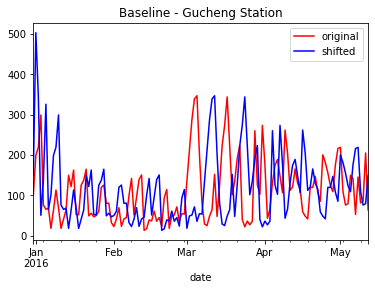

In [105]:
#baseline
base_guch = train_guch['PM10'].shift(7)

fig, ax = plt.subplots()

train_guch[1035:1169].PM10.plot(ax=ax, c='r', label='original')
base_guch[1035:1169].plot(ax=ax, c='b', label='shifted')
ax.set_title('Baseline - Gucheng Station')
ax.legend();

In [106]:
#RMSE for the Baseline Model
np.sqrt(mean_squared_error(train_guch.PM10[7:], base_guch.dropna()))

103.55028131691988

### First Simple Model - AR 

In [107]:
ar_guch = ARIMA(train_guch['PM10'], order=(1, 0, 0)).fit()
ar_guch.predict(typ='levels')

date
2013-03-01    120.502435
2013-03-02     64.172645
2013-03-03     82.926151
2013-03-04    120.251971
2013-03-05     82.880853
                 ...    
2016-05-08     83.741521
2016-05-09    134.149694
2016-05-10     99.278846
2016-05-11    101.702307
2016-05-12    166.456262
Freq: D, Name: predicted_mean, Length: 1169, dtype: float64

In [108]:
ar_guch.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -6490.133
Date:                Fri, 11 Nov 2022   AIC                          12986.266
Time:                        16:27:03   BIC                          13001.458
Sample:                    03-01-2013   HQIC                         12991.996
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        120.5024      4.870     24.746      0.000     110.958     130.047
ar.L1          0.5436      0.019     27.912      0.000       0.505       0.582
sigma2      3884.5668    115.211     33.717      0.000    3658.758    4110.376
===================================================================================
Ljung-Box (L1) (Q):                   2.47   Jarque-Bera (JB):               342.98
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                             0.42
Prob(H) (two-sided):                  0.07   Kurtosis:                         5.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [109]:
print(f"Train set RMSE: {find_rmse(ar_guch)}")
print(f"Test set RMSE: {find_rmse_test(ar_guch)}")

Train set RMSE: 61.318204142800724
Test set RMSE: 74.95872148650275


### MA Model

In [110]:
ma_guch = ARIMA(train_guch['PM10'], order=(0, 0, 1)).fit()
ma_guch.predict(typ='levels')

date
2013-03-01    120.487398
2013-03-02     79.250685
2013-03-03    107.305130
2013-03-04    126.731625
2013-03-05     83.184541
                 ...    
2016-05-08     87.225246
2016-05-09    149.436145
2016-05-10     86.781400
2016-05-11    120.058630
2016-05-12    162.625237
Freq: D, Name: predicted_mean, Length: 1169, dtype: float64

In [111]:
ma_guch.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -6517.183
Date:                Fri, 11 Nov 2022   AIC                          13040.367
Time:                        16:27:05   BIC                          13055.558
Sample:                    03-01-2013   HQIC                         13046.097
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        120.4874      3.240     37.192      0.000     114.138     126.837
ma.L1          0.4958      0.022     23.059      0.000       0.454       0.538
sigma2      4071.8302    125.850     32.355      0.000    3825.168    4318.492
===================================================================================
Ljung-Box (L1) (Q):                  14.23   Jarque-Bera (JB):               582.44
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                             0.91
Prob(H) (two-sided):                  0.03   Kurtosis:                         5.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [112]:
print(f"Train set RMSE: {find_rmse(ma_guch)}")
print(f"Test set RMSE: {find_rmse_test(ma_guch)}")

Train set RMSE: 62.21518842739251
Test set RMSE: 75.04039868284768


### PACF & ACF Charts

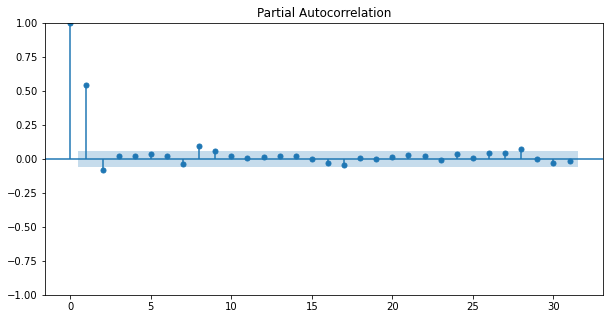

In [114]:
fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(train_guch['PM10'], method='ywm', ax=ax);

Possible p-values: 1, 2, or 8

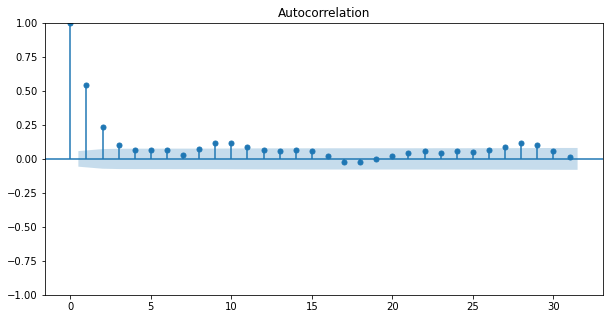

In [115]:
fig, ax = plt.subplots(figsize=(10,5))
plot_acf(train_guch['PM10'], ax=ax);

Possible q values: 1, 2, or 3.

### ARIMA Model

In [116]:
arima_guch1 = ARIMA(train_guch['PM10'], order=(1, 0, 1)).fit()
arima_guch1.predict(typ='levels')

date
2013-03-01    120.502831
2013-03-02     64.168799
2013-03-03     88.603893
2013-03-04    125.314072
2013-03-05     78.791986
                 ...    
2016-05-08     79.060813
2016-05-09    141.961247
2016-05-10     93.984192
2016-05-11    104.269694
2016-05-12    173.102047
Freq: D, Name: predicted_mean, Length: 1169, dtype: float64

In [117]:
arima_guch1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -6485.714
Date:                Fri, 11 Nov 2022   AIC                          12979.429
Time:                        16:27:15   BIC                          12999.685
Sample:                    03-01-2013   HQIC                         12987.069
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        120.5028      4.550     26.485      0.000     111.585     129.420
ar.L1          0.4322      0.037     11.723      0.000       0.360       0.504
ma.L1          0.1594      0.042      3.770      0.000       0.077       0.242
sigma2      3859.1741    116.493     33.128      0.000    3630.852    4087.496
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               448.28
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                             0.49
Prob(H) (two-sided):                  0.05   Kurtosis:                         5.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [118]:
print(f"Train set RMSE: {find_rmse(arima_guch1)}")
print(f"Test set RMSE: {find_rmse_test(arima_guch1)}")

Train set RMSE: 61.100556716370356
Test set RMSE: 74.95141031649409


Performed slightly better than the previous models.

In [119]:
arima_guch2 = ARIMA(train_guch['PM10'], order=(1, 0, 2)).fit()
arima_guch2.predict(typ='levels')

date
2013-03-01    120.478918
2013-03-02     64.153600
2013-03-03     88.567998
2013-03-04    125.238100
2013-03-05     78.752422
                 ...    
2016-05-08     79.083473
2016-05-09    141.961974
2016-05-10     93.914971
2016-05-11    104.302527
2016-05-12    173.045725
Freq: D, Name: predicted_mean, Length: 1169, dtype: float64

In [120]:
arima_guch2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -6485.714
Date:                Fri, 11 Nov 2022   AIC                          12981.428
Time:                        16:27:16   BIC                          13006.748
Sample:                    03-01-2013   HQIC                         12990.978
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        120.4789      4.554     26.453      0.000     111.552     129.406
ar.L1          0.4349      0.094      4.634      0.000       0.251       0.619
ma.L1          0.1566      0.101      1.555      0.120      -0.041       0.354
ma.L2         -0.0018      0.062     -0.029      0.977      -0.124       0.120
sigma2      3858.8810    117.395     32.871      0.000    3628.791    4088.971
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               447.87
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                             0.49
Prob(H) (two-sided):                  0.05   Kurtosis:                         5.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [121]:
print(f"Train set RMSE: {find_rmse(arima_guch2)}")
print(f"Test set RMSE: {find_rmse_test(arima_guch2)}")

Train set RMSE: 61.09534447655906
Test set RMSE: 74.94013040163163


performed worse than the previous ARIMA model

-----

## Huairou Station
### Train Test Split

In [122]:
pct_train_h = 0.80
cutoff_h = round(len(df_huai_avg) * pct_train_h)
train_huai, test_huai = df_huai_avg[:cutoff_h], df_huai_avg[cutoff_h:]

In [123]:
#checking for nulls
train_huai.isna().sum()

No        0
PM2.5    11
PM10     11
SO2      11
NO2      11
CO       12
O3       14
TEMP      0
PRES      0
DEWP      0
RAIN      0
WSPM      0
dtype: int64

In [124]:
train_huai.loc[train_huai['PM10'].isna()]

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,,,,,,,
2013-05-07,1620.5,NaN,NaN,NaN,NaN,NaN,NaN,22.462500,1006.212500,11.283333,0.000000,1.316667
2013-05-08,1644.5,NaN,NaN,NaN,NaN,NaN,NaN,20.504167,1004.908333,9.987500,0.000000,1.908333
2013-05-09,1668.5,NaN,NaN,NaN,NaN,NaN,NaN,16.929167,1000.866667,10.662500,0.000000,1.479167
2013-05-10,1692.5,NaN,NaN,NaN,NaN,NaN,NaN,19.575000,992.541667,3.391667,0.000000,2.383333
2013-05-11,1716.5,NaN,NaN,NaN,NaN,NaN,NaN,22.558333,986.795833,-3.479167,0.000000,2.679167
2013-05-12,1740.5,NaN,NaN,NaN,NaN,NaN,NaN,21.016667,991.495833,-2.541667,0.000000,1.641667
2013-05-13,1764.5,NaN,NaN,NaN,NaN,NaN,NaN,21.375000,993.525000,3.979167,0.000000,1.862500
2013-05-14,1788.5,NaN,NaN,NaN,NaN,NaN,NaN,22.770833,999.187500,1.504167,0.000000,2.654167
2014-05-31,10956.5,NaN,NaN,NaN,NaN,NaN,NaN,27.033333,998.558333,14.741667,0.091667,1.862500


In [125]:
#imputing null values with median 
train_huai = train_huai.fillna(train_huai.median())

In [126]:
train_huai.loc[train_huai['No'] == 1620.5]

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,,,,,,,
2013-05-07,1620.5,51.895833,78.270833,7.063406,28.583333,860.0,53.958333,22.4625,1006.2125,11.283333,0.0,1.316667


### Checking for Stationarity

In [127]:
#autolag set to AIC to minimize it
huai_dft = adfuller(train_huai['PM10'], autolag='AIC')
output_huai = pd.Series(huai_dft[0:4], index=['test statistic', 'pvalue', 
                                               'number of lags used', 'number of observations'])
output_huai

test statistic           -1.589970e+01
pvalue                    8.356487e-29
number of lags used       2.000000e+00
number of observations    1.166000e+03
dtype: float64

The p-value is less than 0.05; series is stationary.

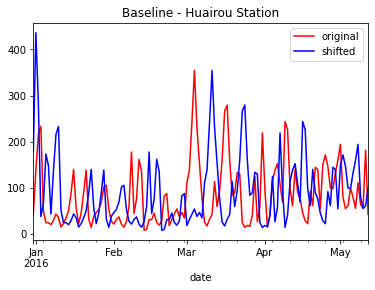

In [128]:
#baseline
base_huai = train_huai['PM10'].shift(7)

fig, ax = plt.subplots()

train_huai[1035:1169].PM10.plot(ax=ax, c='r', label='original')
base_huai[1035:1169].plot(ax=ax, c='b', label='shifted')
ax.set_title('Baseline - Huairou Station')
ax.legend();

In [129]:
#RMSE for the Baseline Model
np.sqrt(mean_squared_error(train_huai.PM10[7:], base_huai.dropna()))

92.29088966654662

### First Simple Model - AR

In [130]:
ar_huai = ARIMA(train_huai['PM10'], order=(1, 0, 0)).fit()
ar_huai.predict(typ='levels')

date
2013-03-01     93.601129
2013-03-02     48.845794
2013-03-03     64.824700
2013-03-04     86.520198
2013-03-05     67.304186
                 ...    
2016-05-08     72.607530
2016-05-09    103.262987
2016-05-10     77.428751
2016-05-11     72.997819
2016-05-12    141.832761
Freq: D, Name: predicted_mean, Length: 1169, dtype: float64

In [131]:
ar_huai.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -6330.770
Date:                Fri, 11 Nov 2022   AIC                          12667.539
Time:                        16:27:21   BIC                          12682.731
Sample:                    03-01-2013   HQIC                         12673.269
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         93.6011      4.461     20.981      0.000      84.857     102.345
ar.L1          0.5510      0.019     28.759      0.000       0.513       0.589
sigma2      2958.4693     88.556     33.408      0.000    2784.902    3132.036
===================================================================================
Ljung-Box (L1) (Q):                   8.91   Jarque-Bera (JB):               410.50
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                             0.65
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [132]:
print(f"Train set RMSE: {find_rmse(ar_huai)}")
print(f"Test set RMSE: {find_rmse_test(ar_huai)}")

Train set RMSE: 58.301530385420335
Test set RMSE: 66.68470961064543


### MA Model

In [133]:
ma_huai = ARIMA(train_huai['PM10'], order=(0, 0, 1)).fit()
ma_huai.predict(typ='levels')

date
2013-03-01     93.583596
2013-03-02     59.467847
2013-03-03     84.353890
2013-03-04     91.656644
2013-03-05     68.779077
                 ...    
2016-05-08     80.476060
2016-05-09    110.286703
2016-05-10     68.503741
2016-05-11     86.885309
2016-05-12    144.929645
Freq: D, Name: predicted_mean, Length: 1169, dtype: float64

In [134]:
ma_huai.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -6339.673
Date:                Fri, 11 Nov 2022   AIC                          12685.345
Time:                        16:27:22   BIC                          12700.537
Sample:                    03-01-2013   HQIC                         12691.075
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         93.5836      2.967     31.540      0.000      87.768      99.399
ma.L1          0.5448      0.020     27.120      0.000       0.505       0.584
sigma2      3005.1556     91.827     32.726      0.000    2825.177    3185.134
===================================================================================
Ljung-Box (L1) (Q):                  13.73   Jarque-Bera (JB):               595.79
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             1.02
Prob(H) (two-sided):                  0.69   Kurtosis:                         5.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [135]:
print(f"Train set RMSE: {find_rmse(ma_huai)}")
print(f"Test set RMSE: {find_rmse_test(ma_huai)}")

Train set RMSE: 58.55778305700495
Test set RMSE: 66.75258093378976


Performed slightly worse than the previous model - AR.

### PACF & ACF Charts

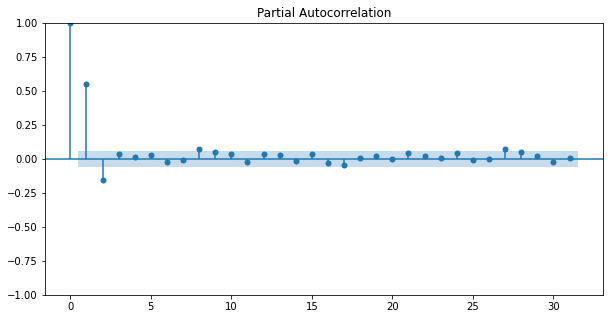

In [138]:
fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(train_huai['PM10'], method='ywm', ax=ax);

Possible p values: 1 or 2.

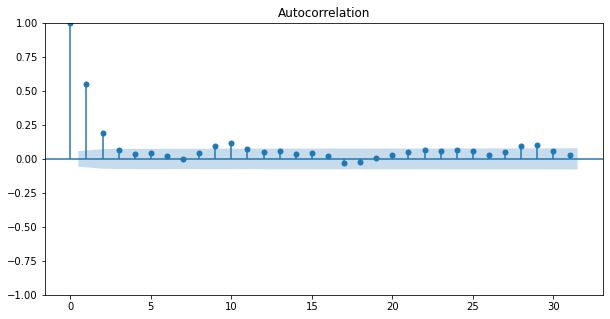

In [139]:
fig, ax = plt.subplots(figsize=(10,5))
plot_acf(train_huai['PM10'], ax=ax);

Possible q values: 1, 2, or 10.

### ARIMA Model

In [140]:
arima_huai1 = ARIMA(train_huai['PM10'], order=(1, 0, 1)).fit()
arima_huai1.predict(typ='levels')

date
2013-03-01     93.601001
2013-03-02     48.787269
2013-03-03     72.874905
2013-03-04     91.267530
2013-03-05     63.524015
                 ...    
2016-05-08     72.373930
2016-05-09    110.993757
2016-05-10     69.696519
2016-05-11     76.373058
2016-05-12    154.945640
Freq: D, Name: predicted_mean, Length: 1169, dtype: float64

In [141]:
arima_huai1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -6314.982
Date:                Fri, 11 Nov 2022   AIC                          12637.963
Time:                        16:27:32   BIC                          12658.219
Sample:                    03-01-2013   HQIC                         12645.603
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         93.6010      3.984     23.495      0.000      85.793     101.409
ar.L1          0.3572      0.040      8.820      0.000       0.278       0.437
ma.L1          0.2871      0.044      6.600      0.000       0.202       0.372
sigma2      2884.1515     84.285     34.219      0.000    2718.955    3049.348
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               534.45
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                             0.69
Prob(H) (two-sided):                  0.61   Kurtosis:                         6.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [142]:
print(f"Train set RMSE: {find_rmse(arima_huai1)}")
print(f"Test set RMSE: {find_rmse_test(arima_huai1)}")

Train set RMSE: 57.66625378811801
Test set RMSE: 66.68589930373841


In [143]:
arima_huai2 = ARIMA(train_huai['PM10'], order=(2, 0, 2)).fit()
arima_huai2.predict(typ='levels')

date
2013-03-01     93.558919
2013-03-02     48.681327
2013-03-03     72.140259
2013-03-04     89.455014
2013-03-05     61.696224
                 ...    
2016-05-08     74.607789
2016-05-09    112.424820
2016-05-10     70.896040
2016-05-11     78.266770
2016-05-12    155.168962
Freq: D, Name: predicted_mean, Length: 1169, dtype: float64

In [144]:
arima_huai2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -6312.482
Date:                Fri, 11 Nov 2022   AIC                          12636.963
Time:                        16:27:33   BIC                          12667.347
Sample:                    03-01-2013   HQIC                         12648.423
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         93.5589      6.050     15.465      0.000      81.702     105.416
ar.L1          1.2836      0.075     17.120      0.000       1.137       1.431
ar.L2         -0.3020      0.060     -5.054      0.000      -0.419      -0.185
ma.L1         -0.6460      0.071     -9.088      0.000      -0.785      -0.507
ma.L2         -0.2971      0.045     -6.636      0.000      -0.385      -0.209
sigma2      2868.0364     83.718     34.258      0.000    2703.952    3032.121
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               551.50
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                             0.69
Prob(H) (two-sided):                  0.59   Kurtosis:                         6.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [145]:
print(f"Train set RMSE: {find_rmse(arima_huai2)}")
print(f"Test set RMSE: {find_rmse_test(arima_huai2)}")

Train set RMSE: 57.49172600114739
Test set RMSE: 66.7219634780103


Performed better on the train set, but worse on the test set than the first ARIMA model.

----
## Nongzhanguan Station
### Train Test Split

In [146]:
pct_train_n = 0.80
cutoff_n = round(len(df_nong_avg) * pct_train_n)
train_nong, test_nong = df_nong_avg[:cutoff_n], df_nong_avg[cutoff_n:]

In [147]:
#checking nulls
train_nong.isna().sum()

No        0
PM2.5     1
PM10      1
SO2       1
NO2       2
CO       10
O3        1
TEMP      0
PRES      0
DEWP      0
RAIN      0
WSPM      0
dtype: int64

In [148]:
train_nong.loc[train_nong['PM10'].isna()]

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,,,,,,,
2015-10-09,22860.5,NaN,NaN,NaN,NaN,NaN,NaN,13.4875,1007.525,-1.566667,0.0,2.9875


In [149]:
#imputing missing values with median
train_nong = train_nong.fillna(train_nong.median())

In [150]:
train_nong.loc[train_nong['No'] == 22860.5]

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,,,,,,,
2015-10-09,22860.5,63.0625,93.833333,12.480769,54.291667,1041.583333,53.145833,13.4875,1007.525,-1.566667,0.0,2.9875


### Checking Stationarity

In [151]:
#autolag set to AIC to minimize it
nong_dft = adfuller(train_nong['PM10'], autolag='AIC')
output_nong = pd.Series(nong_dft[0:4], index=['test statistic', 'pvalue', 
                                               'number of lags used', 'number of observations'])
output_nong

test statistic           -8.078394e+00
pvalue                    1.484020e-12
number of lags used       9.000000e+00
number of observations    1.159000e+03
dtype: float64

The p-value is less than 0.05. The series is stationary; therefore can go straight into modeling.

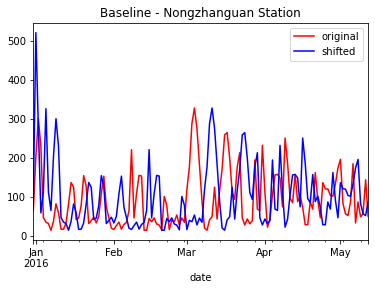

In [152]:
#baseline
base_nong = train_nong['PM10'].shift(7)

fig, ax = plt.subplots()

train_nong[1035:1169].PM10.plot(ax=ax, c='r', label='original')
base_nong[1035:1169].plot(ax=ax, c='b', label='shifted')
ax.set_title('Baseline - Nongzhanguan Station')
ax.legend();

In [153]:
#RMSE for the Baseline Model
np.sqrt(mean_squared_error(train_nong.PM10[7:], base_nong.dropna()))

107.10839779755773

### First Simple Model - AR

In [154]:
ar_nong = ARIMA(train_nong['PM10'], order=(1, 0, 0)).fit()
ar_nong.predict(typ='levels')

date
2013-03-01    110.798001
2013-03-02     58.735135
2013-03-03     72.731976
2013-03-04    123.663115
2013-03-05     71.364843
                 ...    
2016-05-08     69.924717
2016-05-09     97.961010
2016-05-10     78.026905
2016-05-11     82.371728
2016-05-12    127.590911
Freq: D, Name: predicted_mean, Length: 1169, dtype: float64

In [155]:
ar_nong.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -6552.831
Date:                Fri, 11 Nov 2022   AIC                          13111.663
Time:                        16:27:39   BIC                          13126.854
Sample:                    03-01-2013   HQIC                         13117.393
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        110.7980      5.087     21.781      0.000     100.828     120.768
ar.L1          0.5208      0.020     26.446      0.000       0.482       0.559
sigma2      4325.4499    128.690     33.611      0.000    4073.222    4577.678
===================================================================================
Ljung-Box (L1) (Q):                   7.75   Jarque-Bera (JB):               526.85
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.83
Prob(H) (two-sided):                  0.70   Kurtosis:                         5.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [156]:
print(f"Train set RMSE: {find_rmse(ar_nong)}")
print(f"Test set RMSE: {find_rmse_test(ar_nong)}")

Train set RMSE: 58.41854564663276
Test set RMSE: 70.91637807865077


### MA Model

In [157]:
ma_nong = ARIMA(train_nong['PM10'], order=(0, 0, 1)).fit()
ma_nong.predict(typ='levels')

date
2013-03-01    110.785216
2013-03-02     69.339298
2013-03-03     94.945682
2013-03-04    132.008269
2013-03-05     59.455951
                 ...    
2016-05-08     48.241462
2016-05-09    130.953715
2016-05-10     66.584803
2016-05-11    105.269436
2016-05-12    130.881195
Freq: D, Name: predicted_mean, Length: 1169, dtype: float64

In [158]:
ma_nong.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -6552.075
Date:                Fri, 11 Nov 2022   AIC                          13110.151
Time:                        16:27:40   BIC                          13125.343
Sample:                    03-01-2013   HQIC                         13115.881
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        110.7852      3.549     31.219      0.000     103.830     117.741
ma.L1          0.5320      0.022     24.433      0.000       0.489       0.575
sigma2      4322.0970    134.443     32.148      0.000    4058.594    4585.600
===================================================================================
Ljung-Box (L1) (Q):                   8.54   Jarque-Bera (JB):               633.27
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             1.13
Prob(H) (two-sided):                  0.93   Kurtosis:                         5.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [159]:
print(f"Train set RMSE: {find_rmse(ma_nong)}")
print(f"Test set RMSE: {find_rmse_test(ma_nong)}")

Train set RMSE: 58.501439647876666
Test set RMSE: 70.99950909029032


Performed worse than the AR model.

### PACF & ACF Charts

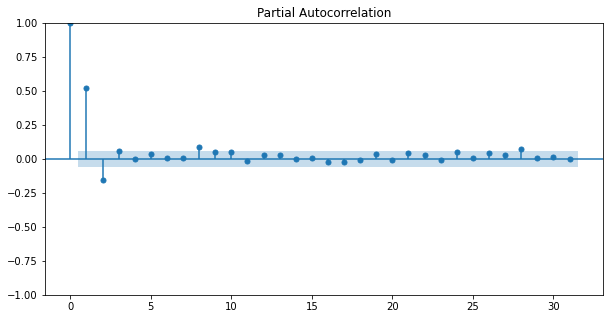

In [160]:
fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(train_nong['PM10'], method='ywm', ax=ax);

Possible p values: 1, 2, or 8

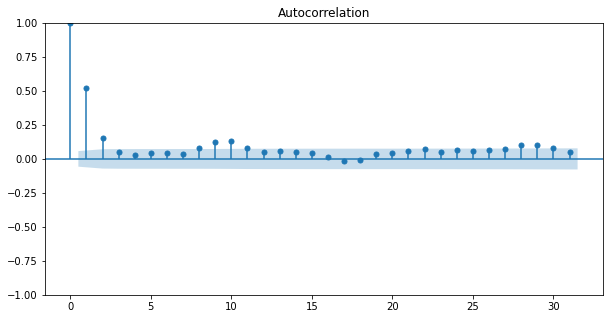

In [161]:
fig, ax = plt.subplots(figsize=(10,5))
plot_acf(train_nong['PM10'], ax=ax);

Possible q values: 1, 2, or 9.

### ARIMA Model

In [162]:
arima_nong1 = ARIMA(train_huai['PM10'], order=(1, 0, 1)).fit()
arima_nong1.predict(typ='levels')

date
2013-03-01     93.601001
2013-03-02     48.787269
2013-03-03     72.874905
2013-03-04     91.267530
2013-03-05     63.524015
                 ...    
2016-05-08     72.373930
2016-05-09    110.993757
2016-05-10     69.696519
2016-05-11     76.373058
2016-05-12    154.945640
Freq: D, Name: predicted_mean, Length: 1169, dtype: float64

In [163]:
arima_nong1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -6314.982
Date:                Fri, 11 Nov 2022   AIC                          12637.963
Time:                        16:27:48   BIC                          12658.219
Sample:                    03-01-2013   HQIC                         12645.603
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         93.6010      3.984     23.495      0.000      85.793     101.409
ar.L1          0.3572      0.040      8.820      0.000       0.278       0.437
ma.L1          0.2871      0.044      6.600      0.000       0.202       0.372
sigma2      2884.1515     84.285     34.219      0.000    2718.955    3049.348
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               534.45
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                             0.69
Prob(H) (two-sided):                  0.61   Kurtosis:                         6.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [164]:
print(f"Train set RMSE: {find_rmse(arima_nong1)}")
print(f"Test set RMSE: {find_rmse_test(arima_nong1)}")

Train set RMSE: 57.66625378811801
Test set RMSE: 66.68589930373841


Performed better than the other models AR and MA.

In [165]:
arima_nong2 = ARIMA(train_nong['PM10'], order=(1, 0, 2)).fit()
arima_nong2.predict(typ='levels')

date
2013-03-01    110.797201
2013-03-02     58.733804
2013-03-03     82.453939
2013-03-04    134.417193
2013-03-05     56.836939
                 ...    
2016-05-08     47.996426
2016-05-09    115.802475
2016-05-10     70.292412
2016-05-11     90.171200
2016-05-12    136.746557
Freq: D, Name: predicted_mean, Length: 1169, dtype: float64

In [166]:
arima_nong2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -6536.417
Date:                Fri, 11 Nov 2022   AIC                          13082.833
Time:                        16:27:49   BIC                          13108.153
Sample:                    03-01-2013   HQIC                         13092.383
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        110.7972      4.501     24.616      0.000     101.975     119.619
ar.L1          0.3202      0.141      2.270      0.023       0.044       0.597
ma.L1          0.2918      0.145      2.013      0.044       0.008       0.576
ma.L2         -0.0141      0.087     -0.162      0.871      -0.185       0.156
sigma2      4190.6813    128.875     32.517      0.000    3938.091    4443.271
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               598.74
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.91
Prob(H) (two-sided):                  0.75   Kurtosis:                         5.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [167]:
print(f"Train set RMSE: {find_rmse(arima_nong2)}")
print(f"Test set RMSE: {find_rmse_test(arima_nong2)}")

Train set RMSE: 57.819275321446725
Test set RMSE: 70.93893306970739


Performed worst than the previous model.

-----
## Shunyi Station
### Train Test Split

In [168]:
pct_train_s = 0.80
cutoff_s = round(len(df_shun_avg) * pct_train_s)
train_shun, test_shun = df_shun_avg[:cutoff_s], df_shun_avg[cutoff_s:]

In [169]:
#checking for nulls
train_shun.isna().sum()

No        0
PM2.5    10
PM10      1
SO2       8
NO2      18
CO       33
O3        1
TEMP      0
PRES      0
DEWP      0
RAIN      0
WSPM      0
dtype: int64

In [170]:
train_shun.loc[train_shun['PM10'].isna()]

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,,,,,,,
2016-05-02,27804.5,NaN,NaN,NaN,NaN,NaN,NaN,15.383333,1004.745833,8.6375,0.491667,2.633333


In [171]:
#impute missing values with median
train_shun = train_shun.fillna(train_shun.median())

In [172]:
train_shun.loc[train_shun['No'] == 27804.5]

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,,,,,,,
2016-05-02,27804.5,60.916667,85.395833,7.291667,38.458333,953.17029,49.200738,15.383333,1004.745833,8.6375,0.491667,2.633333


### Checking Stationarity

In [173]:
#autolag set to AIC to minimize it
shun_dft = adfuller(train_shun['PM10'], autolag='AIC')
output_shun = pd.Series(shun_dft[0:4], index=['test statistic', 'pvalue', 
                                               'number of lags used', 'number of observations'])
output_shun

test statistic           -1.577137e+01
pvalue                    1.159926e-28
number of lags used       2.000000e+00
number of observations    1.166000e+03
dtype: float64

The p-value is less than 0.05. The series is stationary; therefore can move on to modeling.

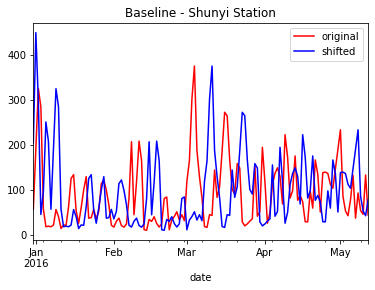

In [174]:
#baseline model
base_shun = train_shun['PM10'].shift(7)

fig, ax = plt.subplots()

train_shun[1035:1169].PM10.plot(ax=ax, c='r', label='original')
base_shun[1035:1169].plot(ax=ax, c='b', label='shifted')
ax.set_title('Baseline - Shunyi Station')
ax.legend();

In [175]:
#RMSE for the Baseline Model
np.sqrt(mean_squared_error(train_shun.PM10[7:], base_shun.dropna()))

98.16893491240673

### First Simple Model - AR

In [176]:
ar_shun = ARIMA(train_shun['PM10'], order=(1, 0, 0)).fit()
ar_shun.predict(typ='levels')

date
2013-03-01    101.036114
2013-03-02     51.540743
2013-03-03     67.083600
2013-03-04     97.890646
2013-03-05     64.337982
                 ...    
2016-05-08     66.215328
2016-05-09     96.473837
2016-05-10     75.401610
2016-05-11     70.858825
2016-05-12    118.130778
Freq: D, Name: predicted_mean, Length: 1169, dtype: float64

In [177]:
ar_shun.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -6431.947
Date:                Fri, 11 Nov 2022   AIC                          12869.894
Time:                        16:27:57   BIC                          12885.086
Sample:                    03-01-2013   HQIC                         12875.624
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.0361      4.689     21.549      0.000      91.846     110.226
ar.L1          0.5397      0.018     29.985      0.000       0.504       0.575
sigma2      3517.2055    108.832     32.318      0.000    3303.899    3730.512
===================================================================================
Ljung-Box (L1) (Q):                   7.37   Jarque-Bera (JB):               306.58
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                             0.61
Prob(H) (two-sided):                  0.51   Kurtosis:                         5.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [178]:
print(f"Train set RMSE: {find_rmse(ar_shun)}")
print(f"Test set RMSE: {find_rmse_test(ar_shun)}")

Train set RMSE: 57.372179513714784
Test set RMSE: 68.01008376025487


### MA Model

In [179]:
ma_shun = ARIMA(train_shun['PM10'], order=(0, 0, 1)).fit()
ma_shun.predict(typ='levels')

date
2013-03-01    101.023467
2013-03-02     62.654617
2013-03-03     88.582476
2013-03-04    104.543352
2013-03-05     62.550984
                 ...    
2016-05-08     57.829833
2016-05-09    119.821178
2016-05-10     65.173752
2016-05-11     90.179361
2016-05-12    124.026828
Freq: D, Name: predicted_mean, Length: 1169, dtype: float64

In [180]:
ma_shun.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -6437.931
Date:                Fri, 11 Nov 2022   AIC                          12881.863
Time:                        16:27:59   BIC                          12897.055
Sample:                    03-01-2013   HQIC                         12887.593
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.0235      3.182     31.749      0.000      94.787     107.260
ma.L1          0.5409      0.020     26.788      0.000       0.501       0.580
sigma2      3555.4006    114.846     30.958      0.000    3330.307    3780.494
===================================================================================
Ljung-Box (L1) (Q):                  10.85   Jarque-Bera (JB):               428.37
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                             0.97
Prob(H) (two-sided):                  0.58   Kurtosis:                         5.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [181]:
print(f"Train set RMSE: {find_rmse(ma_shun)}")
print(f"Test set RMSE: {find_rmse_test(ma_shun)}")

Train set RMSE: 57.83133932029285
Test set RMSE: 68.0890927116865


Peformed worse than the AR model.

### PACF & ACF Charts

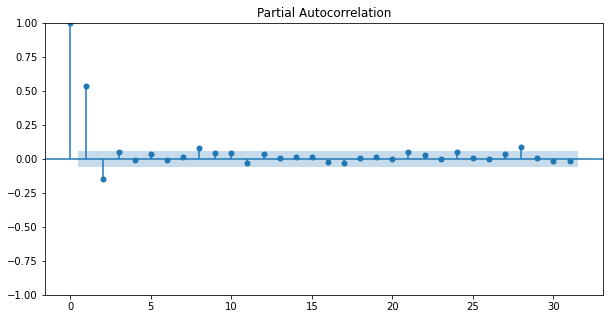

In [182]:
fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(train_shun['PM10'], method='ywm', ax=ax);

Possible p values: 1, 2, or 8.

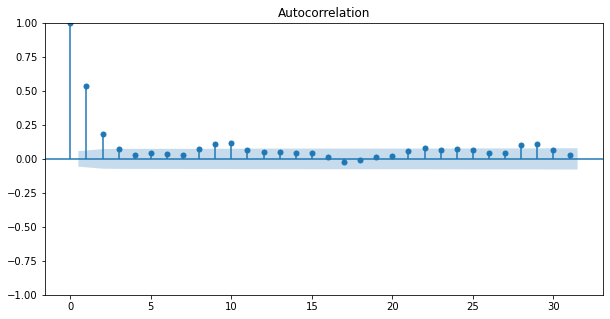

In [183]:
fig, ax = plt.subplots(figsize=(10,5))
plot_acf(train_shun['PM10'], ax=ax);

Possible q values: 1,2 or 9

### ARIMA Models

In [184]:
arima_shun1 = ARIMA(train_shun['PM10'], order=(1, 0, 1)).fit()
arima_shun1.predict(typ='levels')

date
2013-03-01    101.036015
2013-03-02     51.594393
2013-03-03     75.937430
2013-03-04    104.647420
2013-03-05     57.238871
                 ...    
2016-05-08     54.309671
2016-05-09    109.288690
2016-05-10     68.776311
2016-05-11     75.247334
2016-05-12    128.438946
Freq: D, Name: predicted_mean, Length: 1169, dtype: float64

In [185]:
arima_shun1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -6417.509
Date:                Fri, 11 Nov 2022   AIC                          12843.019
Time:                        16:28:05   BIC                          12863.274
Sample:                    03-01-2013   HQIC                         12850.659
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.0360      4.167     24.246      0.000      92.869     109.203
ar.L1          0.3384      0.040      8.479      0.000       0.260       0.417
ma.L1          0.2904      0.044      6.601      0.000       0.204       0.377
sigma2      3436.1479    105.865     32.458      0.000    3228.655    3643.640
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               345.86
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                             0.66
Prob(H) (two-sided):                  0.65   Kurtosis:                         5.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [186]:
print(f"Train set RMSE: {find_rmse(arima_shun1)}")
print(f"Test set RMSE: {find_rmse_test(arima_shun1)}")

Train set RMSE: 56.89072118963616
Test set RMSE: 68.0290505591018


In [187]:
arima_shun2 = ARIMA(train_shun['PM10'], order=(2, 0, 2)).fit()
arima_shun2.predict(typ='levels')

/Users/juanatavera/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/juanatavera/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


date
2013-03-01    101.036030
2013-03-02     51.537202
2013-03-03     75.565448
2013-03-04    103.888333
2013-03-05     57.116583
                 ...    
2016-05-08     54.445109
2016-05-09    109.677761
2016-05-10     67.828216
2016-05-11     75.813821
2016-05-12    127.643218
Freq: D, Name: predicted_mean, Length: 1169, dtype: float64

In [188]:
arima_shun2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -6417.444
Date:                Fri, 11 Nov 2022   AIC                          12846.889
Time:                        16:28:06   BIC                          12877.272
Sample:                    03-01-2013   HQIC                         12858.349
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.0360      4.185     24.141      0.000      92.833     109.239
ar.L1          0.2785      2.248      0.124      0.901      -4.127       4.684
ar.L2          0.0379      0.759      0.050      0.960      -1.451       1.526
ma.L1          0.3493      2.253      0.155      0.877      -4.066       4.764
ma.L2         -0.0014      0.660     -0.002      0.998      -1.295       1.292
sigma2      3413.0784    106.166     32.149      0.000    3204.998    3621.159
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               342.04
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                             0.66
Prob(H) (two-sided):                  0.67   Kurtosis:                         5.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [189]:
print(f"Train set RMSE: {find_rmse(arima_shun2)}")
print(f"Test set RMSE: {find_rmse_test(arima_shun2)}")

Train set RMSE: 56.87760215536778
Test set RMSE: 68.02643323719373


Performed slightly better.

---
## Tiantan Station
### Train Test Split

In [190]:
# train-test split
pct_train_t = 0.80
cutoff_t = round(len(df_tian_avg) * pct_train_t)
train_tian, test_tian = df_tian_avg[:cutoff_t], df_tian_avg[cutoff_t:]

In [191]:
#checking nulls
train_tian.isna().sum()

No        0
PM2.5     0
PM10      0
SO2      21
NO2       3
CO        6
O3        4
TEMP      0
PRES      0
DEWP      0
RAIN      0
WSPM      0
dtype: int64

No missing values in PM10, no need to impute.

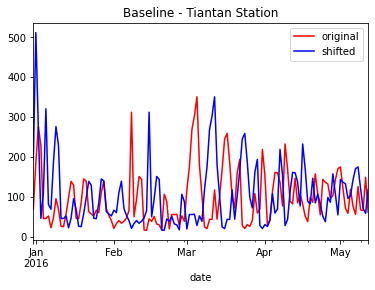

In [192]:
#baseline
base_tian = train_tian['PM10'].shift(7)

fig, ax = plt.subplots()

train_tian[1035:1169].PM10.plot(ax=ax, c='r', label='original')
base_tian[1035:1169].plot(ax=ax, c='b', label='shifted')
ax.set_title('Baseline - Tiantan Station')
ax.legend();

In [193]:
#RMSE for the Baseline Model
np.sqrt(mean_squared_error(train_tian.PM10[7:], base_tian.dropna()))

99.37013877868452

### First Simple Model - AR

In [194]:
ar_tian = ARIMA(train_tian['PM10'], order=(1, 0, 0)).fit()
ar_tian.predict(typ='levels')

date
2013-03-01    107.189804
2013-03-02     59.278395
2013-03-03     70.946487
2013-03-04    114.497317
2013-03-05     71.226349
                 ...    
2016-05-08     80.526378
2016-05-09    116.542462
2016-05-10     86.295840
2016-05-11     85.650005
2016-05-12    128.533472
Freq: D, Name: predicted_mean, Length: 1169, dtype: float64

In [195]:
ar_tian.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -6449.747
Date:                Fri, 11 Nov 2022   AIC                          12905.493
Time:                        16:28:10   BIC                          12920.685
Sample:                    03-01-2013   HQIC                         12911.223
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        107.1898      4.568     23.465      0.000      98.237     116.143
ar.L1          0.5167      0.020     26.067      0.000       0.478       0.556
sigma2      3625.9794    109.821     33.017      0.000    3410.734    3841.225
===================================================================================
Ljung-Box (L1) (Q):                   6.38   Jarque-Bera (JB):               380.32
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.70
Prob(H) (two-sided):                  0.83   Kurtosis:                         5.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [196]:
print(f"Train set RMSE: {find_rmse(ar_tian)}")
print(f"Test set RMSE: {find_rmse_test(ar_tian)}")

Train set RMSE: 58.11508048831304
Test set RMSE: 69.73366476510499


### MA Model

In [197]:
ma_tian = ARIMA(train_tian['PM10'], order=(0, 0, 1)).fit()
ma_tian.predict(typ='levels')

date
2013-03-01    107.173487
2013-03-02     69.440212
2013-03-03     91.370386
2013-03-04    122.388145
2013-03-05     63.669043
                 ...    
2016-05-08     92.685872
2016-05-09    123.961098
2016-05-10     77.717443
2016-05-11    100.883142
2016-05-12    131.689783
Freq: D, Name: predicted_mean, Length: 1169, dtype: float64

In [198]:
ma_tian.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -6454.198
Date:                Fri, 11 Nov 2022   AIC                          12914.396
Time:                        16:28:14   BIC                          12929.588
Sample:                    03-01-2013   HQIC                         12920.126
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        107.1735      3.176     33.749      0.000     100.949     113.398
ma.L1          0.5149      0.022     23.239      0.000       0.471       0.558
sigma2      3655.8702    116.089     31.492      0.000    3428.340    3883.400
===================================================================================
Ljung-Box (L1) (Q):                   8.69   Jarque-Bera (JB):               506.93
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             1.04
Prob(H) (two-sided):                  0.98   Kurtosis:                         5.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [199]:
print(f"Train set RMSE: {find_rmse(ma_tian)}")
print(f"Test set RMSE: {find_rmse_test(ma_tian)}")

Train set RMSE: 58.5424688469566
Test set RMSE: 69.78443203612736


Performed worse on train but better on the test.

### PACF & ACF Chart

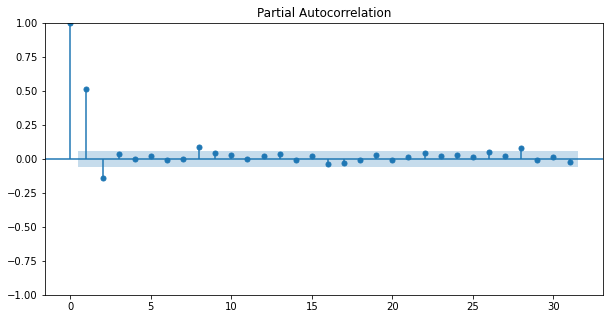

In [200]:
fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(train_tian['PM10'], method='ywm',  ax=ax);

Possible p values 1, 2, or 8.

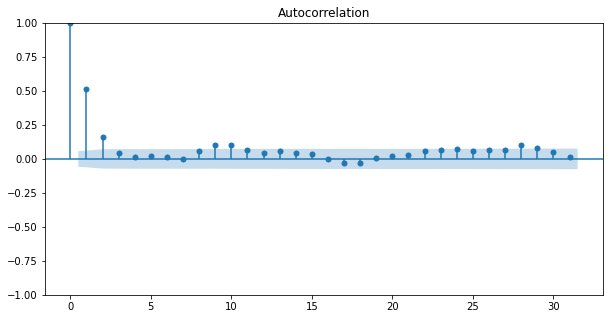

In [201]:
fig, ax = plt.subplots(figsize=(10,5))
plot_acf(train_tian['PM10'], ax=ax);

Possible q values: 1 or 2.

### ARIMA Models

In [202]:
arima_tian1 = ARIMA(train_tian['PM10'], order=(1, 0, 1)).fit()
arima_tian1.predict(typ='levels')

date
2013-03-01    107.190089
2013-03-02     59.243194
2013-03-03     78.819443
2013-03-04    123.432575
2013-03-05     61.270268
                 ...    
2016-05-08     82.600315
2016-05-09    124.762507
2016-05-10     78.260820
2016-05-11     90.371813
2016-05-12    136.428633
Freq: D, Name: predicted_mean, Length: 1169, dtype: float64

In [203]:
arima_tian1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -6436.973
Date:                Fri, 11 Nov 2022   AIC                          12881.947
Time:                        16:28:25   BIC                          12902.202
Sample:                    03-01-2013   HQIC                         12889.587
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        107.1901      4.099     26.150      0.000      99.156     115.224
ar.L1          0.3188      0.042      7.621      0.000       0.237       0.401
ma.L1          0.2764      0.046      6.002      0.000       0.186       0.367
sigma2      3548.4210    107.137     33.121      0.000    3338.437    3758.405
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               431.10
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.78
Prob(H) (two-sided):                  0.77   Kurtosis:                         5.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [204]:
print(f"Train set RMSE: {find_rmse(arima_tian1)}")
print(f"Test set RMSE: {find_rmse_test(arima_tian1)}")

Train set RMSE: 57.57477393778751
Test set RMSE: 69.7390431405531


In [205]:
arima_tian2 = ARIMA(train_tian['PM10'], order=(1, 0, 2)).fit()
arima_tian2.predict(typ='levels')

date
2013-03-01    107.175305
2013-03-02     59.264581
2013-03-03     79.007101
2013-03-04    123.879574
2013-03-05     61.387636
                 ...    
2016-05-08     82.360045
2016-05-09    125.056767
2016-05-10     78.411841
2016-05-11     90.087033
2016-05-12    136.824400
Freq: D, Name: predicted_mean, Length: 1169, dtype: float64

In [206]:
arima_tian2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -6436.949
Date:                Fri, 11 Nov 2022   AIC                          12883.897
Time:                        16:28:26   BIC                          12909.217
Sample:                    03-01-2013   HQIC                         12893.447
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        107.1753      4.080     26.271      0.000      99.179     115.171
ar.L1          0.2865      0.132      2.166      0.030       0.027       0.546
ma.L1          0.3093      0.138      2.244      0.025       0.039       0.579
ma.L2          0.0198      0.080      0.247      0.805      -0.138       0.177
sigma2      3549.7065    110.404     32.152      0.000    3333.319    3766.094
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               436.08
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.78
Prob(H) (two-sided):                  0.79   Kurtosis:                         5.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [207]:
print(f"Train set RMSE: {find_rmse(arima_tian2)}")
print(f"Test set RMSE: {find_rmse_test(arima_tian2)}")

Train set RMSE: 57.57830846047499
Test set RMSE: 69.73539129595156


-----
## Wanliu Station
### Train Test Split

In [208]:
pct_train_w = 0.80
cutoff_w = round(len(df_wanl_avg) * pct_train_w)
train_wanl, test_wanl = df_wanl_avg[:cutoff_w], df_wanl_avg[cutoff_w:]

In [209]:
#checking for nulls
train_wanl.isna().sum()

No        0
PM2.5     0
PM10      0
SO2       0
NO2      22
CO       46
O3       18
TEMP      0
PRES      0
DEWP      0
RAIN      0
WSPM      0
dtype: int64

No missing values in PM10 therefore not necessary to impute.

### Checking Stationarity

In [210]:
#autolag set to AIC to minimize it
wanl_dft = adfuller(train_wanl['PM10'], autolag='AIC')
output_wanl = pd.Series(wanl_dft[0:4], index=['test statistic', 'pvalue', 
                                               'number of lags used', 'number of observations'])
output_wanl

test statistic           -8.537868e+00
pvalue                    9.966128e-14
number of lags used       8.000000e+00
number of observations    1.160000e+03
dtype: float64

The p-value is less than 0.05. The series is stationary; therefore can proceed with modeling.

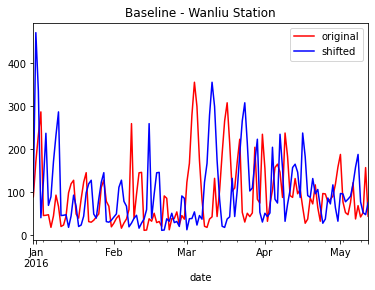

In [211]:
#baseline
base_wanl = train_wanl['PM10'].shift(7)

fig, ax = plt.subplots()

train_wanl[1035:1169].PM10.plot(ax=ax, c='r', label='original')
base_wanl[1035:1169].plot(ax=ax, c='b', label='shifted')
ax.set_title('Baseline - Wanliu Station')
ax.legend();

In [212]:
#RMSE for the Baseline Model
np.sqrt(mean_squared_error(train_wanl.PM10[7:], base_wanl.dropna()))

104.73585573236043

### First Simple Model - AR

In [213]:
ar_wanl = ARIMA(train_tian['PM10'], order=(1, 0, 0)).fit()
ar_wanl.predict(typ='levels')

date
2013-03-01    107.189804
2013-03-02     59.278395
2013-03-03     70.946487
2013-03-04    114.497317
2013-03-05     71.226349
                 ...    
2016-05-08     80.526378
2016-05-09    116.542462
2016-05-10     86.295840
2016-05-11     85.650005
2016-05-12    128.533472
Freq: D, Name: predicted_mean, Length: 1169, dtype: float64

In [214]:
ar_wanl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -6449.747
Date:                Fri, 11 Nov 2022   AIC                          12905.493
Time:                        16:28:30   BIC                          12920.685
Sample:                    03-01-2013   HQIC                         12911.223
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        107.1898      4.568     23.465      0.000      98.237     116.143
ar.L1          0.5167      0.020     26.067      0.000       0.478       0.556
sigma2      3625.9794    109.821     33.017      0.000    3410.734    3841.225
===================================================================================
Ljung-Box (L1) (Q):                   6.38   Jarque-Bera (JB):               380.32
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.70
Prob(H) (two-sided):                  0.83   Kurtosis:                         5.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [215]:
print(f"Train set RMSE: {find_rmse(ar_wanl)}")
print(f"Test set RMSE: {find_rmse_test(ar_wanl)}")

Train set RMSE: 58.11508048831304
Test set RMSE: 69.73366476510499


### MA Model

In [216]:
ma_wanl = ARIMA(train_tian['PM10'], order=(0, 0, 1)).fit()
ma_wanl.predict(typ='levels')

date
2013-03-01    107.173487
2013-03-02     69.440212
2013-03-03     91.370386
2013-03-04    122.388145
2013-03-05     63.669043
                 ...    
2016-05-08     92.685872
2016-05-09    123.961098
2016-05-10     77.717443
2016-05-11    100.883142
2016-05-12    131.689783
Freq: D, Name: predicted_mean, Length: 1169, dtype: float64

In [217]:
ma_wanl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -6454.198
Date:                Fri, 11 Nov 2022   AIC                          12914.396
Time:                        16:28:32   BIC                          12929.588
Sample:                    03-01-2013   HQIC                         12920.126
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        107.1735      3.176     33.749      0.000     100.949     113.398
ma.L1          0.5149      0.022     23.239      0.000       0.471       0.558
sigma2      3655.8702    116.089     31.492      0.000    3428.340    3883.400
===================================================================================
Ljung-Box (L1) (Q):                   8.69   Jarque-Bera (JB):               506.93
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             1.04
Prob(H) (two-sided):                  0.98   Kurtosis:                         5.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [218]:
print(f"Train set RMSE: {find_rmse(ma_wanl)}")
print(f"Test set RMSE: {find_rmse_test(ma_wanl)}")

Train set RMSE: 58.5424688469566
Test set RMSE: 69.78443203612736


Performed worse than the AR model.

### PACF & ACF Charts

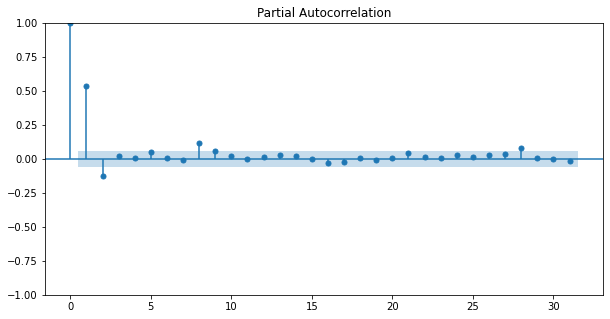

In [219]:
fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(train_wanl['PM10'], method='ywm',  ax=ax);

Possible p values 1, 2, or 8.

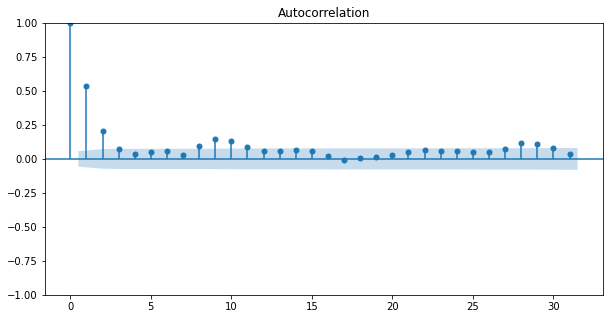

In [220]:
fig, ax = plt.subplots(figsize=(10,5))
plot_acf(train_wanl['PM10'], ax=ax);

Possible q values: 1 or 2.

### ARIMA Models

In [221]:
arima_wanl1 = ARIMA(train_tian['PM10'], order=(1, 0, 1)).fit()
arima_wanl1.predict(typ='levels')

date
2013-03-01    107.190089
2013-03-02     59.243194
2013-03-03     78.819443
2013-03-04    123.432575
2013-03-05     61.270268
                 ...    
2016-05-08     82.600315
2016-05-09    124.762507
2016-05-10     78.260820
2016-05-11     90.371813
2016-05-12    136.428633
Freq: D, Name: predicted_mean, Length: 1169, dtype: float64

In [222]:
arima_wanl1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -6436.973
Date:                Fri, 11 Nov 2022   AIC                          12881.947
Time:                        16:28:42   BIC                          12902.202
Sample:                    03-01-2013   HQIC                         12889.587
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        107.1901      4.099     26.150      0.000      99.156     115.224
ar.L1          0.3188      0.042      7.621      0.000       0.237       0.401
ma.L1          0.2764      0.046      6.002      0.000       0.186       0.367
sigma2      3548.4210    107.137     33.121      0.000    3338.437    3758.405
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               431.10
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.78
Prob(H) (two-sided):                  0.77   Kurtosis:                         5.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [223]:
print(f"Train set RMSE: {find_rmse(arima_wanl1)}")
print(f"Test set RMSE: {find_rmse_test(arima_wanl1)}")

Train set RMSE: 57.57477393778751
Test set RMSE: 69.7390431405531


In [224]:
arima_wanl2 = ARIMA(train_tian['PM10'], order=(1, 0, 2)).fit()
arima_wanl2.predict(typ='levels')

date
2013-03-01    107.175305
2013-03-02     59.264581
2013-03-03     79.007101
2013-03-04    123.879574
2013-03-05     61.387636
                 ...    
2016-05-08     82.360045
2016-05-09    125.056767
2016-05-10     78.411841
2016-05-11     90.087033
2016-05-12    136.824400
Freq: D, Name: predicted_mean, Length: 1169, dtype: float64

In [225]:
arima_wanl2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 1169
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -6436.949
Date:                Fri, 11 Nov 2022   AIC                          12883.897
Time:                        16:28:43   BIC                          12909.217
Sample:                    03-01-2013   HQIC                         12893.447
                         - 05-12-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        107.1753      4.080     26.271      0.000      99.179     115.171
ar.L1          0.2865      0.132      2.166      0.030       0.027       0.546
ma.L1          0.3093      0.138      2.244      0.025       0.039       0.579
ma.L2          0.0198      0.080      0.247      0.805      -0.138       0.177
sigma2      3549.7065    110.404     32.152      0.000    3333.319    3766.094
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               436.08
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.78
Prob(H) (two-sided):                  0.79   Kurtosis:                         5.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [226]:
print(f"Train set RMSE: {find_rmse(arima_wanl2)}")
print(f"Test set RMSE: {find_rmse_test(arima_wanl2)}")

Train set RMSE: 57.57830846047499
Test set RMSE: 69.73539129595156


Performed slightly worse than the previous model based on the AIC score.

### SARIMA Model

In [227]:
#import pmdarima as pm

#fit_wk = pm.auto_arima(train_wanl.PM10, start_p=0, d=1, start_q=0, max_p=6, max_d=6, max_q=6, 
                             #start_P=0, D=1, start_Q=0, max_P=6, max_D=6, max_Q=6, seasonal=True, m=365, trace=True,
                             #error_action='ignore', suppress_warnings=True, stepwise=True)  

#fit_wk.summary()

## Conclusion

These models did not perform very well for all stations based in AIC Score and they were not very accurate with the RMSE as well. I want to try a weekly average to see if that will help. I also tried to run a SARIMA model on these but it kept killing my kernel. I think the move would be to try doing weekly instead. Also might reduce the amount of stations because doing this many models for all the stations is a lot on my processing power. 